In [110]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dataPath = "datasets/Crime_Data_from_2020_to_Present_20240305.csv"
data = pd.read_csv(dataPath)
data.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [111]:
df = data[['DATE OCC', 'TIME OCC', 'AREA', 'Crm Cd','Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd']]
# Define new column names
new_columns = ['date', 'time', 'area', 'crm_cd', 'vict_age', 'vict_sex', 'vict_descent', 'premis_cd']
# Assign the new column names to the DataFrame
df.columns = new_columns
df.head(2)

,date,time,area,crm_cd,vict_age,vict_sex,vict_descent,premis_cd
0,03/01/2020 12:00:00 AM,2130,7,510,0,M,O,101.0
1,02/08/2020 12:00:00 AM,1800,1,330,47,M,O,128.0


In [112]:
def cat_stats(df):
    # df = data.copy()
    ds_cat_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona',
                                        'num_miss', 'pct_miss'])
    tmp = pd.DataFrame()

    for c in df.columns:
        tmp['column'] = [c]
        if isinstance(df[c].iloc[0], (int, float, complex)):
            values = df[c].fillna(-777).unique()
        else:
            values = df[c].fillna('NaN').unique()
        values.sort()
        tmp['values'] = [values]
        tmp['values_count_incna'] = len(list(df[c].unique()))
        tmp['values_count_nona'] = int(df[c].nunique())
        tmp['num_miss'] = df[c].isnull().sum()
        tmp['pct_miss'] = (df[c].isnull().sum()/ len(df)).round(3)*100
        ds_cat_stats = pd.concat([ds_cat_stats, tmp])

    ds_cat_stats.sort_values(by = 'values_count_incna', inplace = True, ascending = True)

    # And set the index to Column Names
    ds_cat_stats.set_index('column', inplace = True)
    return ds_cat_stats

cat_stats(df)

C:\Users\gemj9\AppData\Local\Temp\ipykernel_22860\2205305301.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ds_cat_stats = pd.concat([ds_cat_stats, tmp])


,values,values_count_incna,values_count_nona,num_miss,pct_miss
column,,,,,
vict_sex,"[-, F, H, M, NaN, X]",6,5,119391,13.2
area,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",21,21,0,0.0
vict_descent,"[-, A, B, C, D, F, G, H, I, J, K, L, NaN, O, P...",21,20,119399,13.2
vict_age,"[-4, -3, -2, -1, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10...",104,104,0,0.0
crm_cd,"[110, 113, 121, 122, 210, 220, 230, 231, 235, ...",139,139,0,0.0
premis_cd,"[-777.0, 101.0, 102.0, 103.0, 104.0, 105.0, 10...",315,314,10,0.0
time,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",1439,1439,0,0.0
date,"[01/01/2020 12:00:00 AM, 01/01/2021 12:00:00 A...",1511,1511,0,0.0


c:\Users\gemj9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


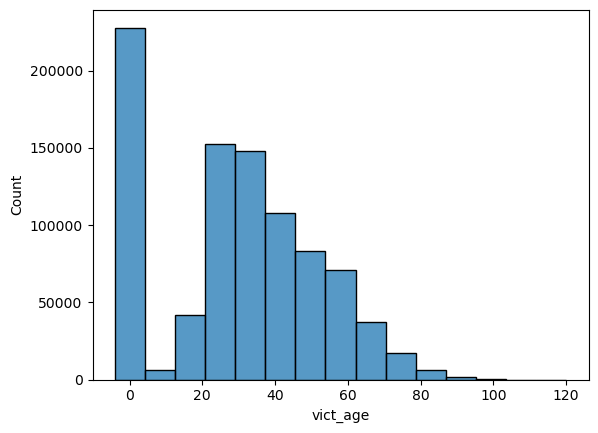

Percentage of ilogical values in vict_age column:
25.14%


c:\Users\gemj9\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


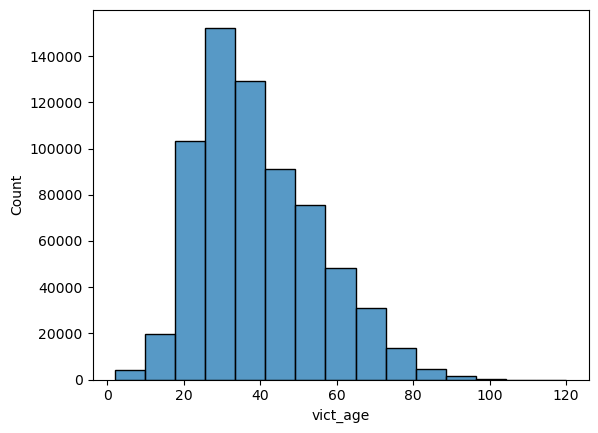

In [113]:
# Create a histogram
sns.histplot(data=df, x='vict_age', bins=15, kde=False)
plt.show()

# Calculate percentage of ilogical age values ( < 1 )
wrong_values = df.loc[df['vict_age'] < 1, 'vict_age'].count() / df['vict_age'].count() * 100
print("Percentage of ilogical values in vict_age column:")
print('{:2.2f}%'.format(wrong_values))
df = df[df['vict_age'] > 0]

# Create a histogram
sns.histplot(data=df, x='vict_age', bins=15, kde=False)
plt.show()

# Definition of functions for filtering and plotting

In [114]:
cat_cols = ['vict_sex', 'vict_descent','premis_cd', 'crm_cd', 'area']

def filterPercent(data, cols, percent):
    for col in cols:
        value_counts = data[col].value_counts()
        # Step 2: Calculate cumulative percentage
        cumulative_perc = value_counts.cumsum() / value_counts.sum() * 100
        # Identify the characters that make up the first 80% of the data
        chars_to_keep = cumulative_perc[cumulative_perc <= percent].index.tolist()
        if cumulative_perc[cumulative_perc > percent].index.size > 0:
            first_char_over_perc = cumulative_perc[cumulative_perc > percent].index[0]
            chars_to_keep.append(first_char_over_perc)
        # Step 3: Filter the DataFrame
        data = data[data[col].isin(chars_to_keep)]
    return data

def doBarplot(data):
    for col in data.columns:
        category_order = data[col].value_counts().index
        sns.countplot(y=col, data=data, order=category_order)
        plt.show()

def doBarplotWithHue(data, normalize=False):
    for col1 in data.columns:
        # print(col1)
        fig, axs = plt.subplots(2, 2, figsize=(18, 18))  # Creates a 2x2 grid of subplots
        axs = axs.flatten()  # Flatten the array to make iteration easier
        cols = [x for x in data.columns if x != col1]

        for ax, col2 in zip(axs, cols):
            data_grouped = (data
                .groupby(col1)[col2]
                .value_counts(normalize=normalize)
                .mul(100)
                .round(2)
                .unstack()
                )
            data_grouped.plot.bar(stacked = True,
                        ax = ax,
                        width = 0.65,
                        edgecolor = "black")
            ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
            ax.set_title(f"Distribution of {col1} by {col2}")
            
            if normalize:
                ax.set_ylabel("Percent")
            else:
                ax.set_ylabel("Counts")
        fig.tight_layout()

def doBoxplotVsAge(data):
    for col in cat_cols:
        sns.boxplot(x=col, y='vict_age', data=data, orient='v')
        plt.show()

def plotFrecuency(data):
    fig = plt.figure(figsize=(15,10))
    iax = 1
    for col in cat_cols:
        if iax <= 3:
            ax1 = fig.add_subplot(2, 3, iax)
            category_order = data[col].value_counts().index
            sns.countplot(y=col, data=data, order=category_order, ax=ax1, orient='h')

            ax2 = fig.add_subplot(2, 3, iax+3)
            sns.boxplot(y=col, x='vict_age', data=data, orient='h', ax=ax2)
        iax += 1
        if iax > 3:
            fig = plt.figure(figsize=(18,10))
            iax = 1

def plotHeatmaps(data, normalize=False):
    for col1 in data.columns:
        fig, axs = plt.subplots(2, 2, figsize=(18, 18))  # Creates a 2x2 grid of subplots
        axs = axs.flatten()  # Flatten the array to make iteration easier
        cols = [x for x in data.columns if x != col1]
        
        for ax, col2 in zip(axs, cols):
            data_grouped = (data
                .groupby(col1)[col2]
                .value_counts(normalize=normalize)
                .mul(100)
                .round(2)
                .unstack().T
                )
            
            if normalize:
                sns.heatmap(data_grouped, ax=ax, vmin=0, vmax=100)
                color_bar = ax.collections[0].colorbar
                color_bar.set_label('Percent')
            else:
                sns.heatmap(data_grouped, ax=ax)
                color_bar = ax.collections[0].colorbar
                color_bar.set_label('Counts')

# Barplots and Boxplots
- Barplot was created for each categorical column
- Boxplot was created for each categorical column vs 'Victim Age' numerical column

### Frecuency plots BEFORE filtering categorical values with too little frecuency

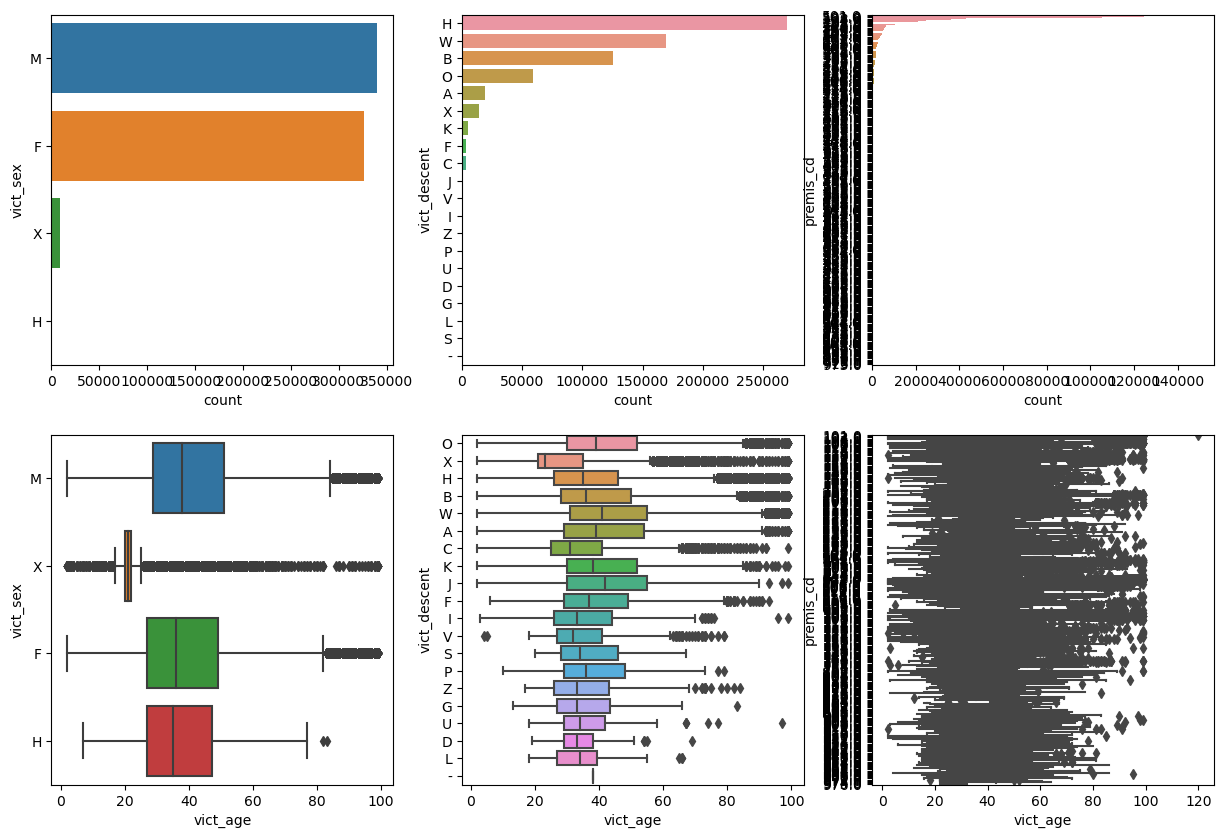

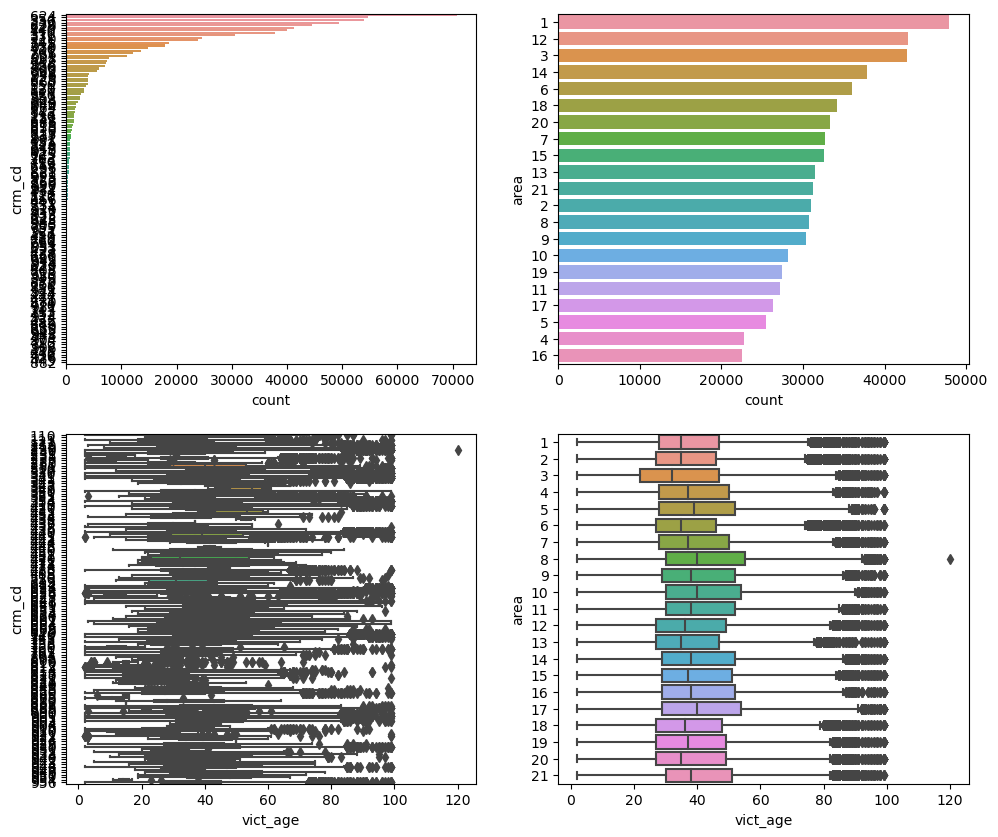

In [115]:
plotFrecuency(df)

### Frecuency plots AFTER filtering categorical values with too little frecuency

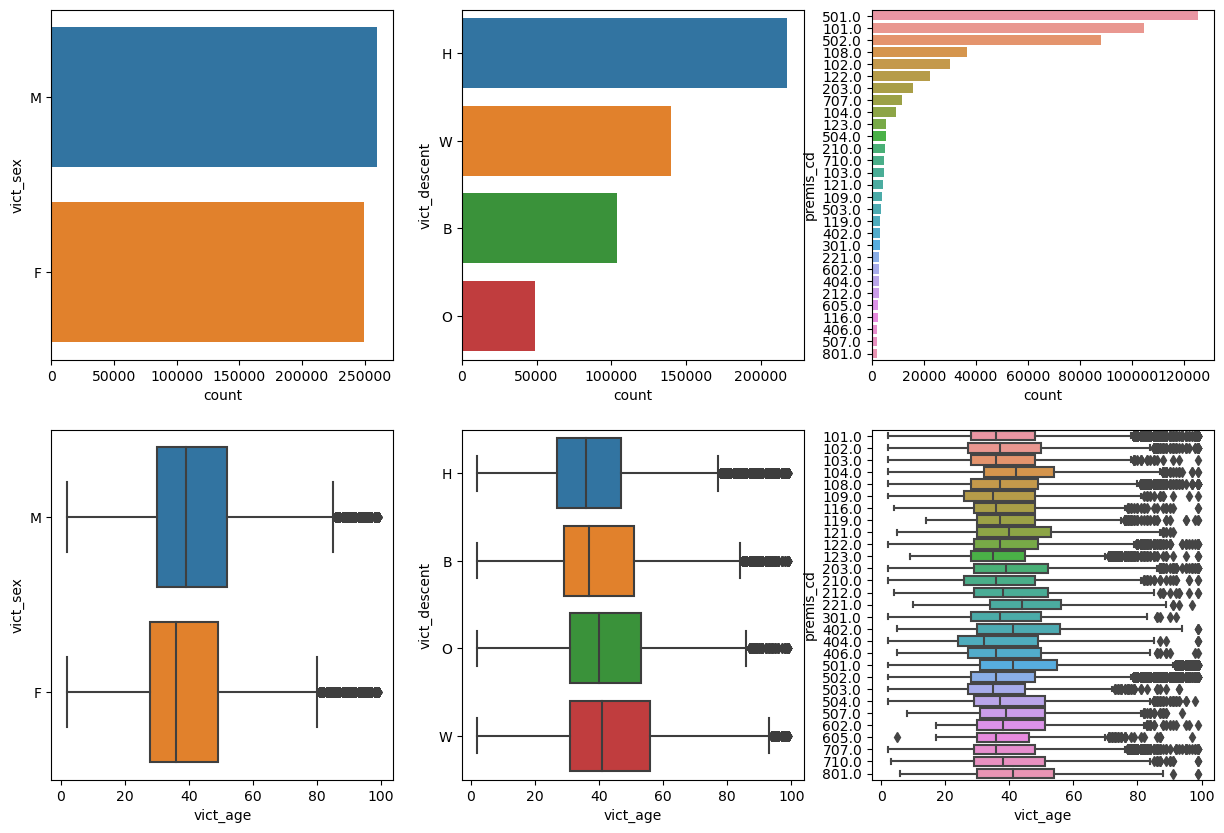

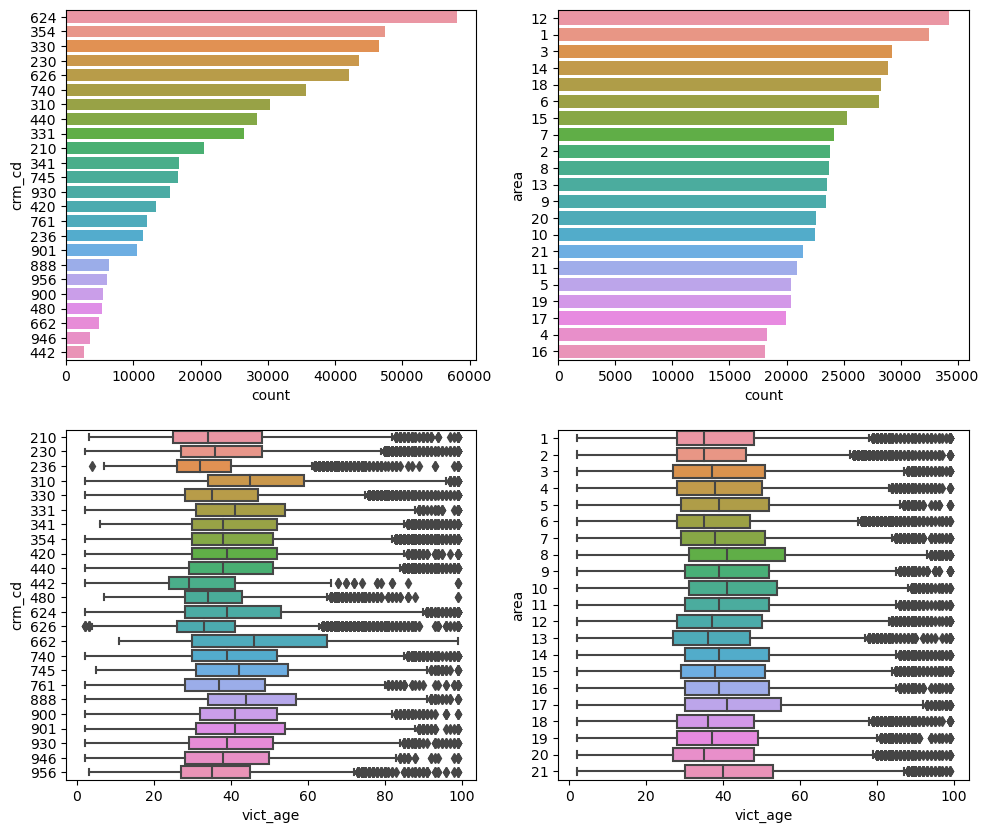

In [116]:
df = filterPercent(df, [ 'premis_cd', 'crm_cd', 'vict_descent', 'vict_sex'], 90)
plotFrecuency(df[cat_cols + ['vict_age']])

### Stacked barplots for each categorical feature vs other categorical features
The y-axis is the number of ocurrencies for each combination.

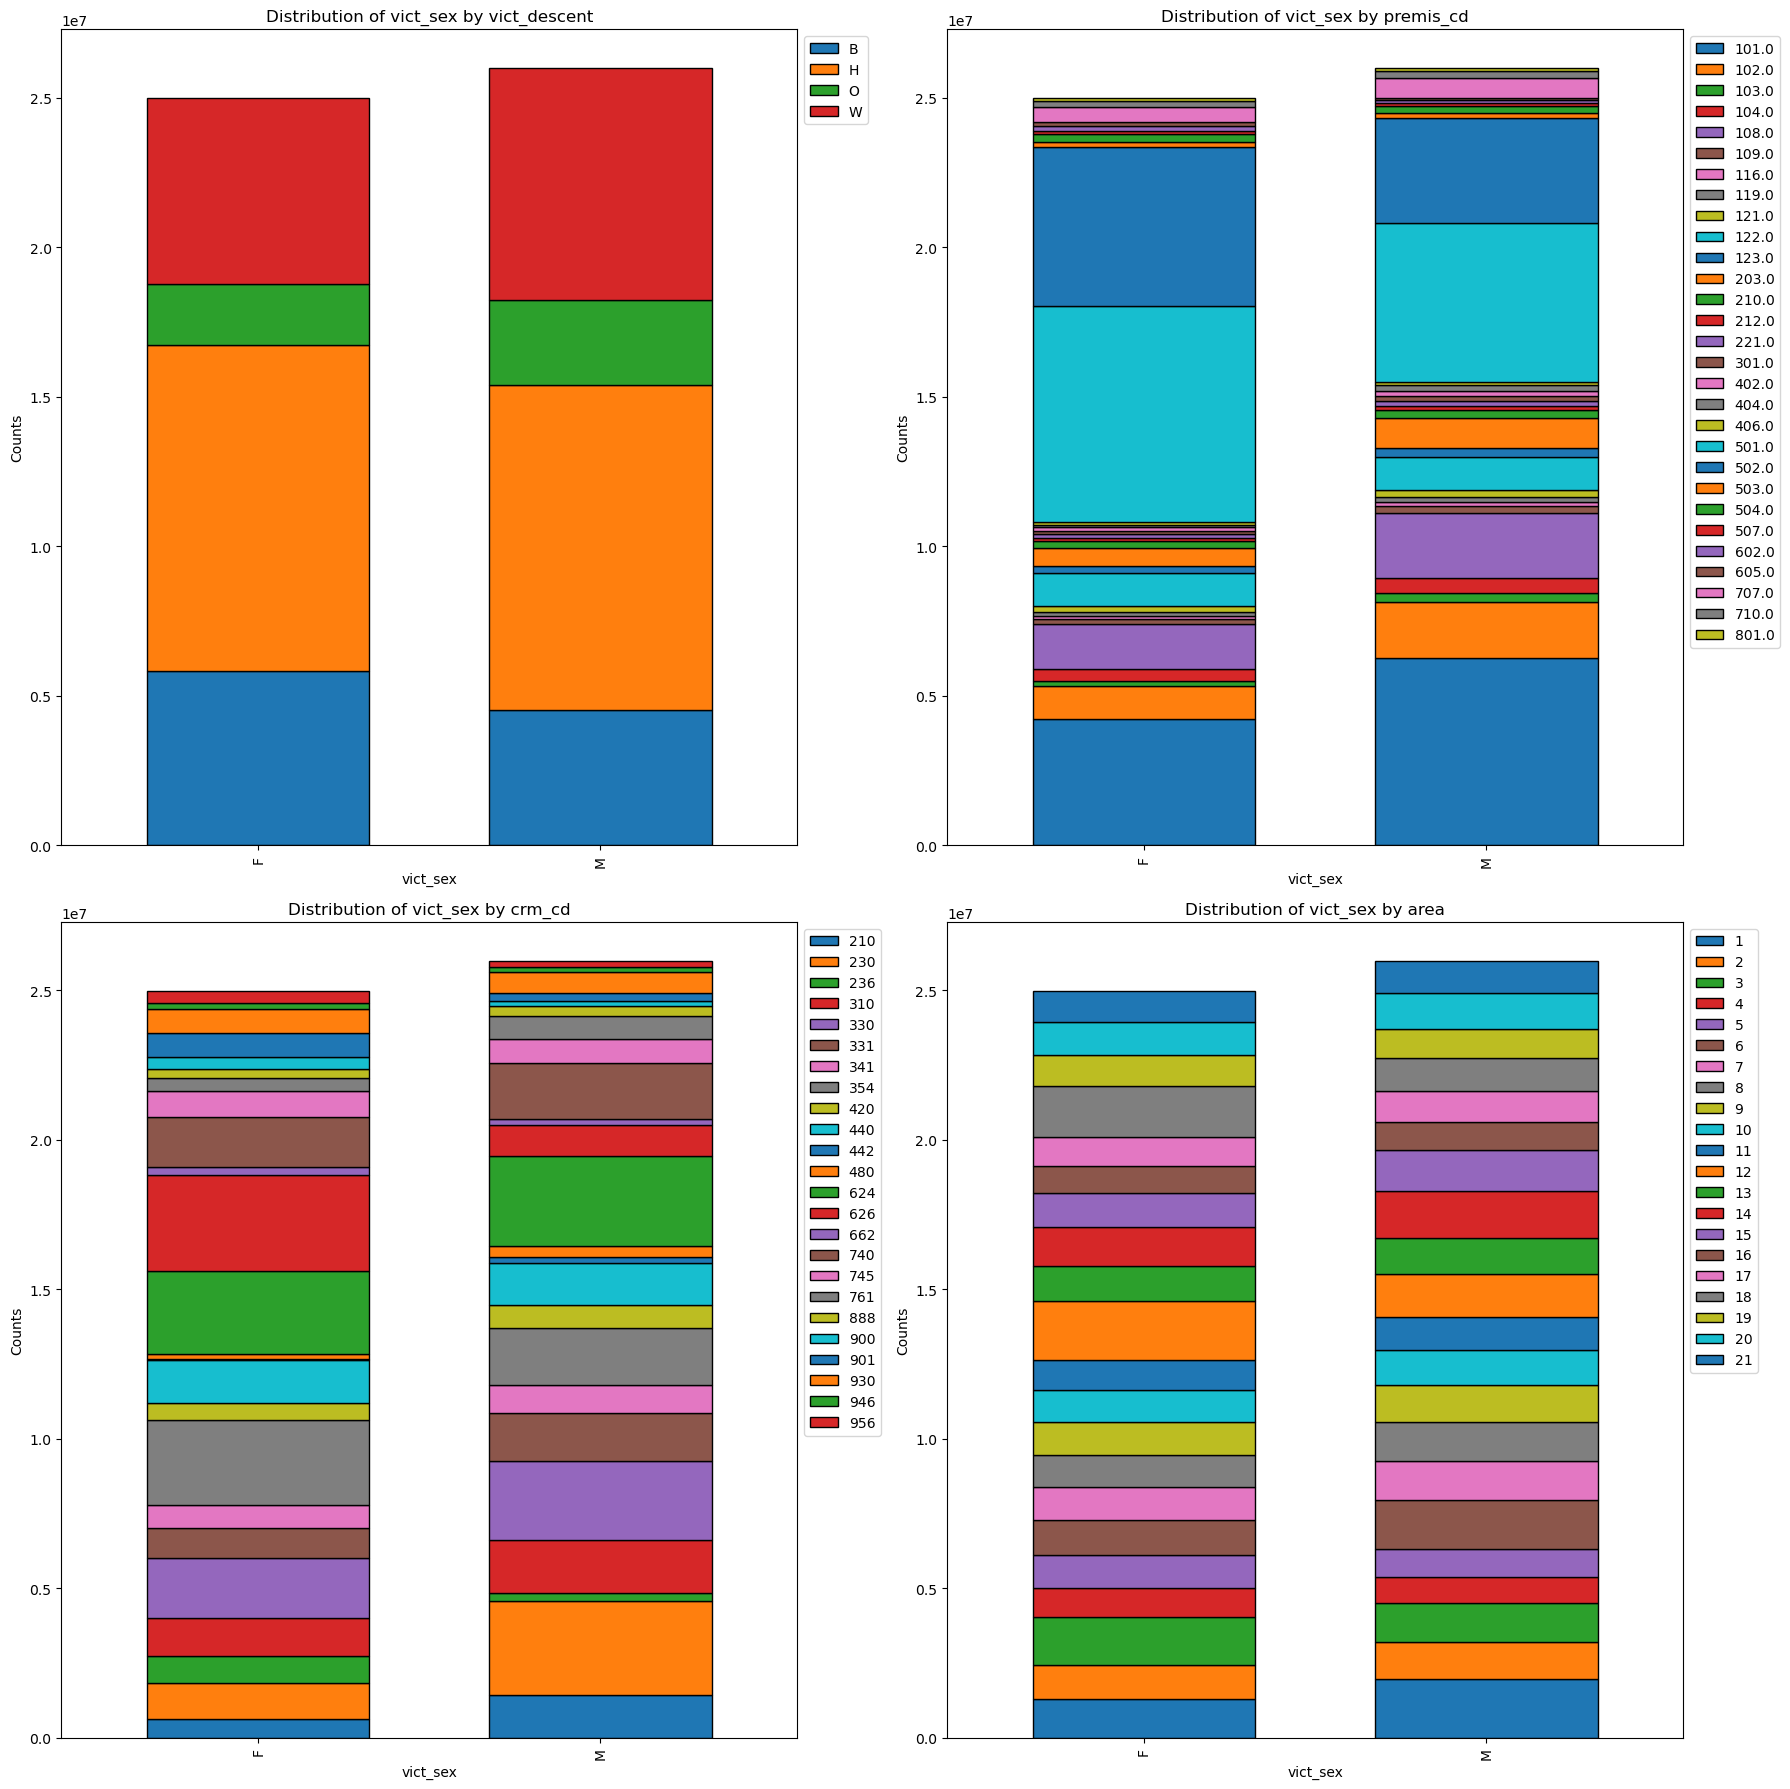

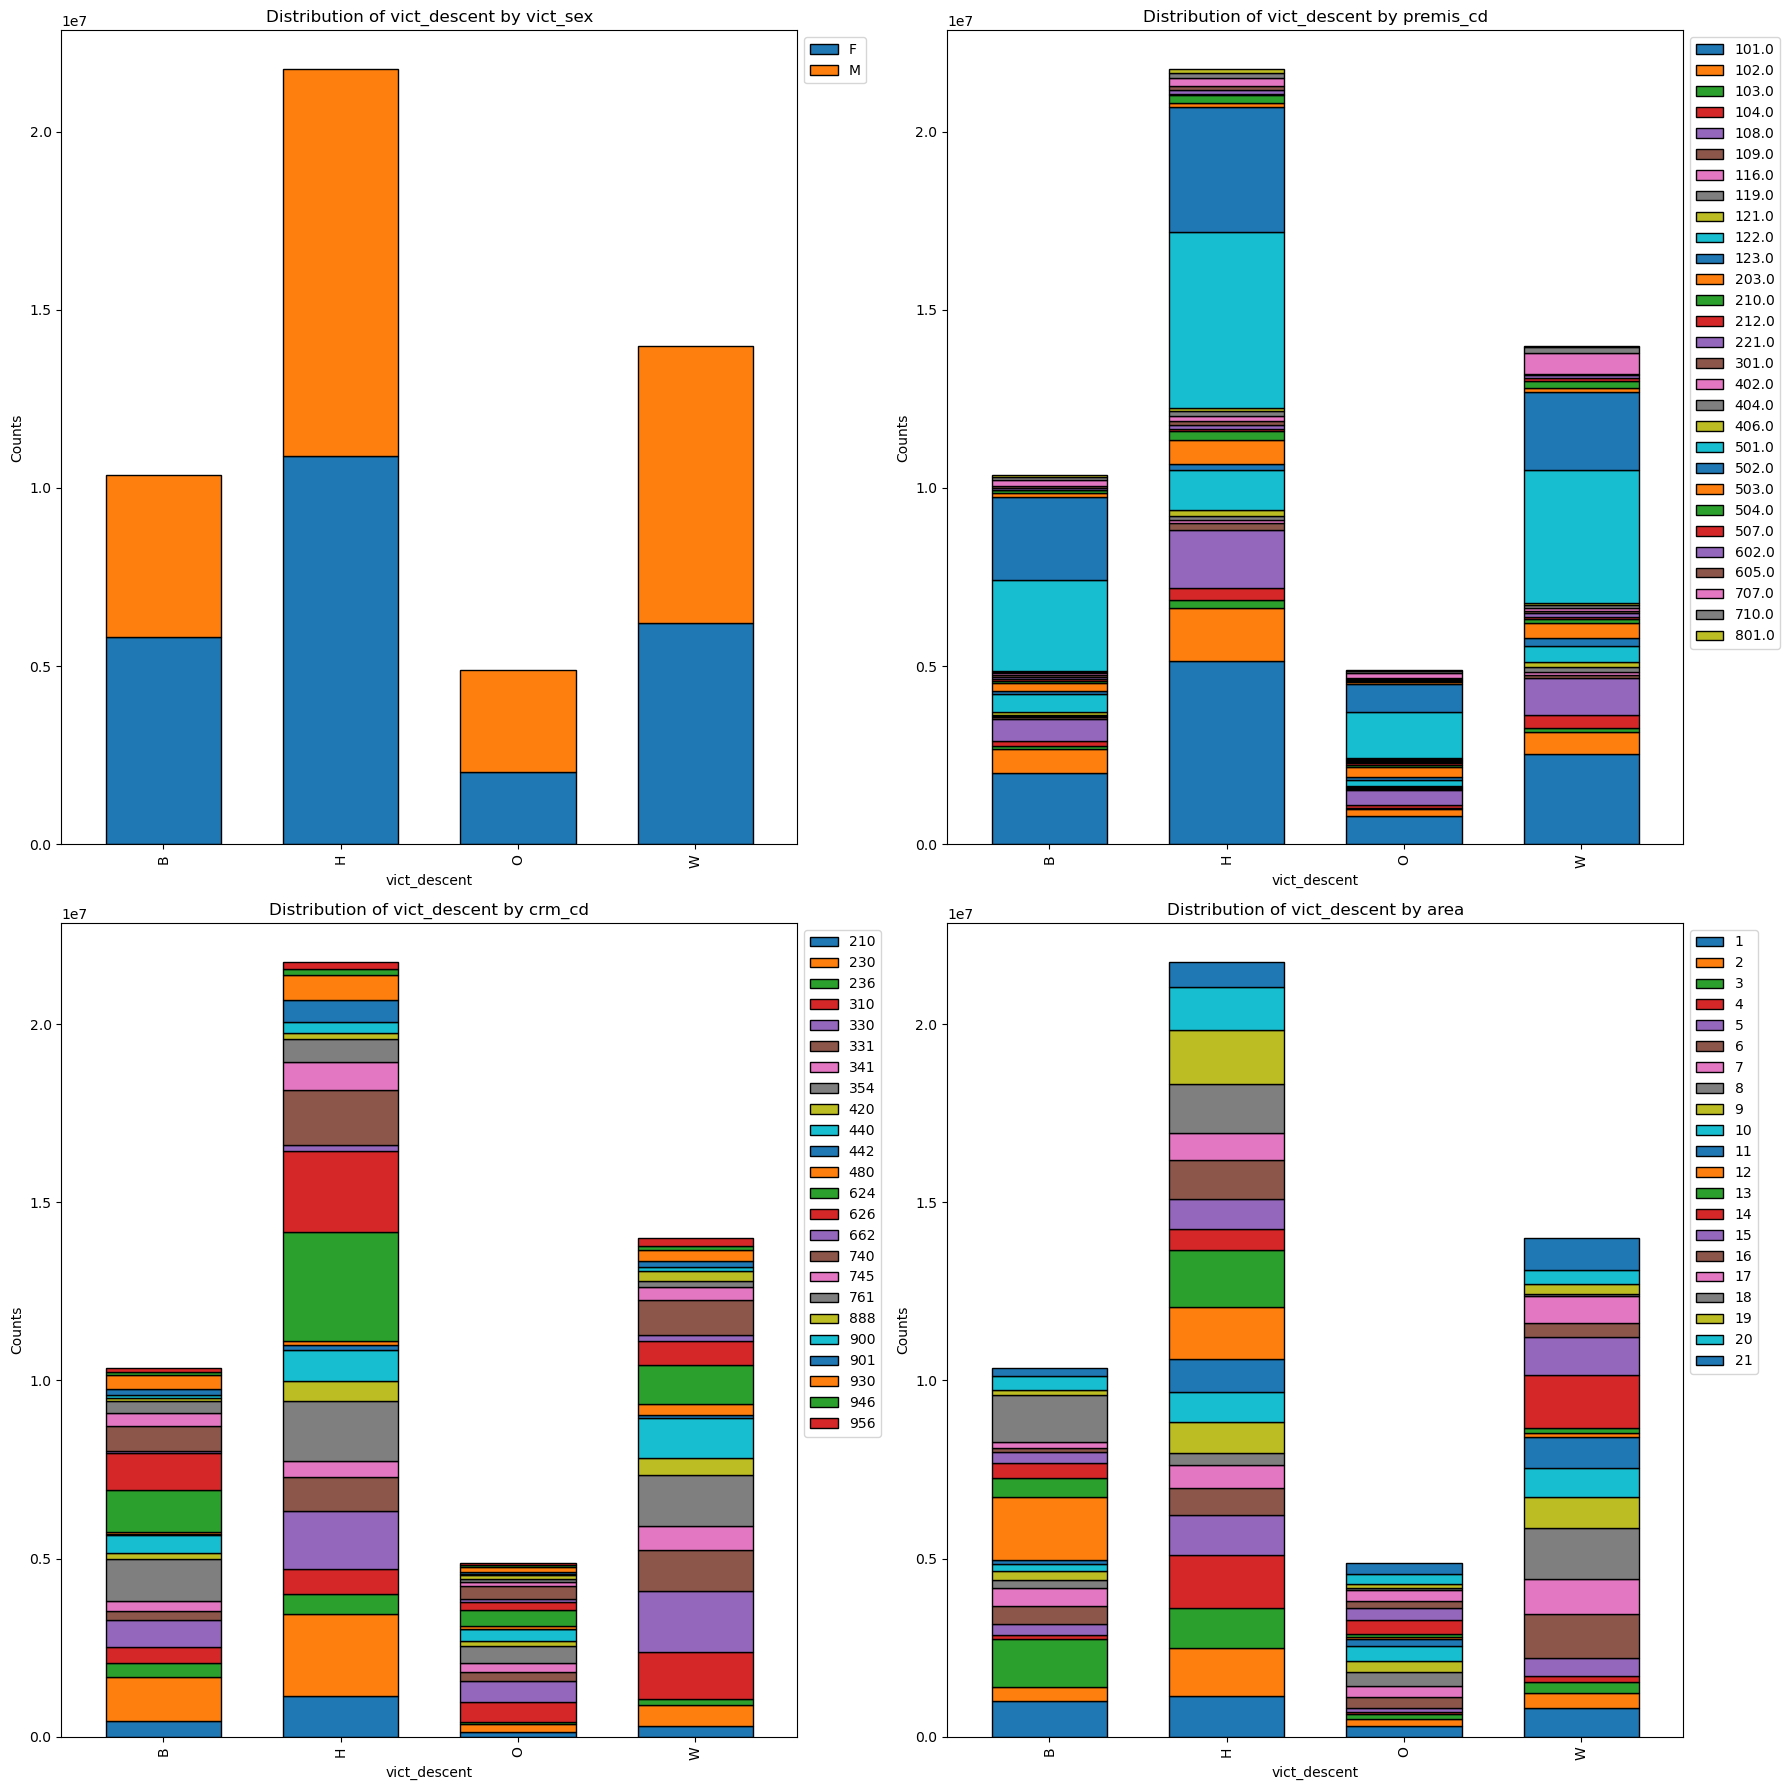

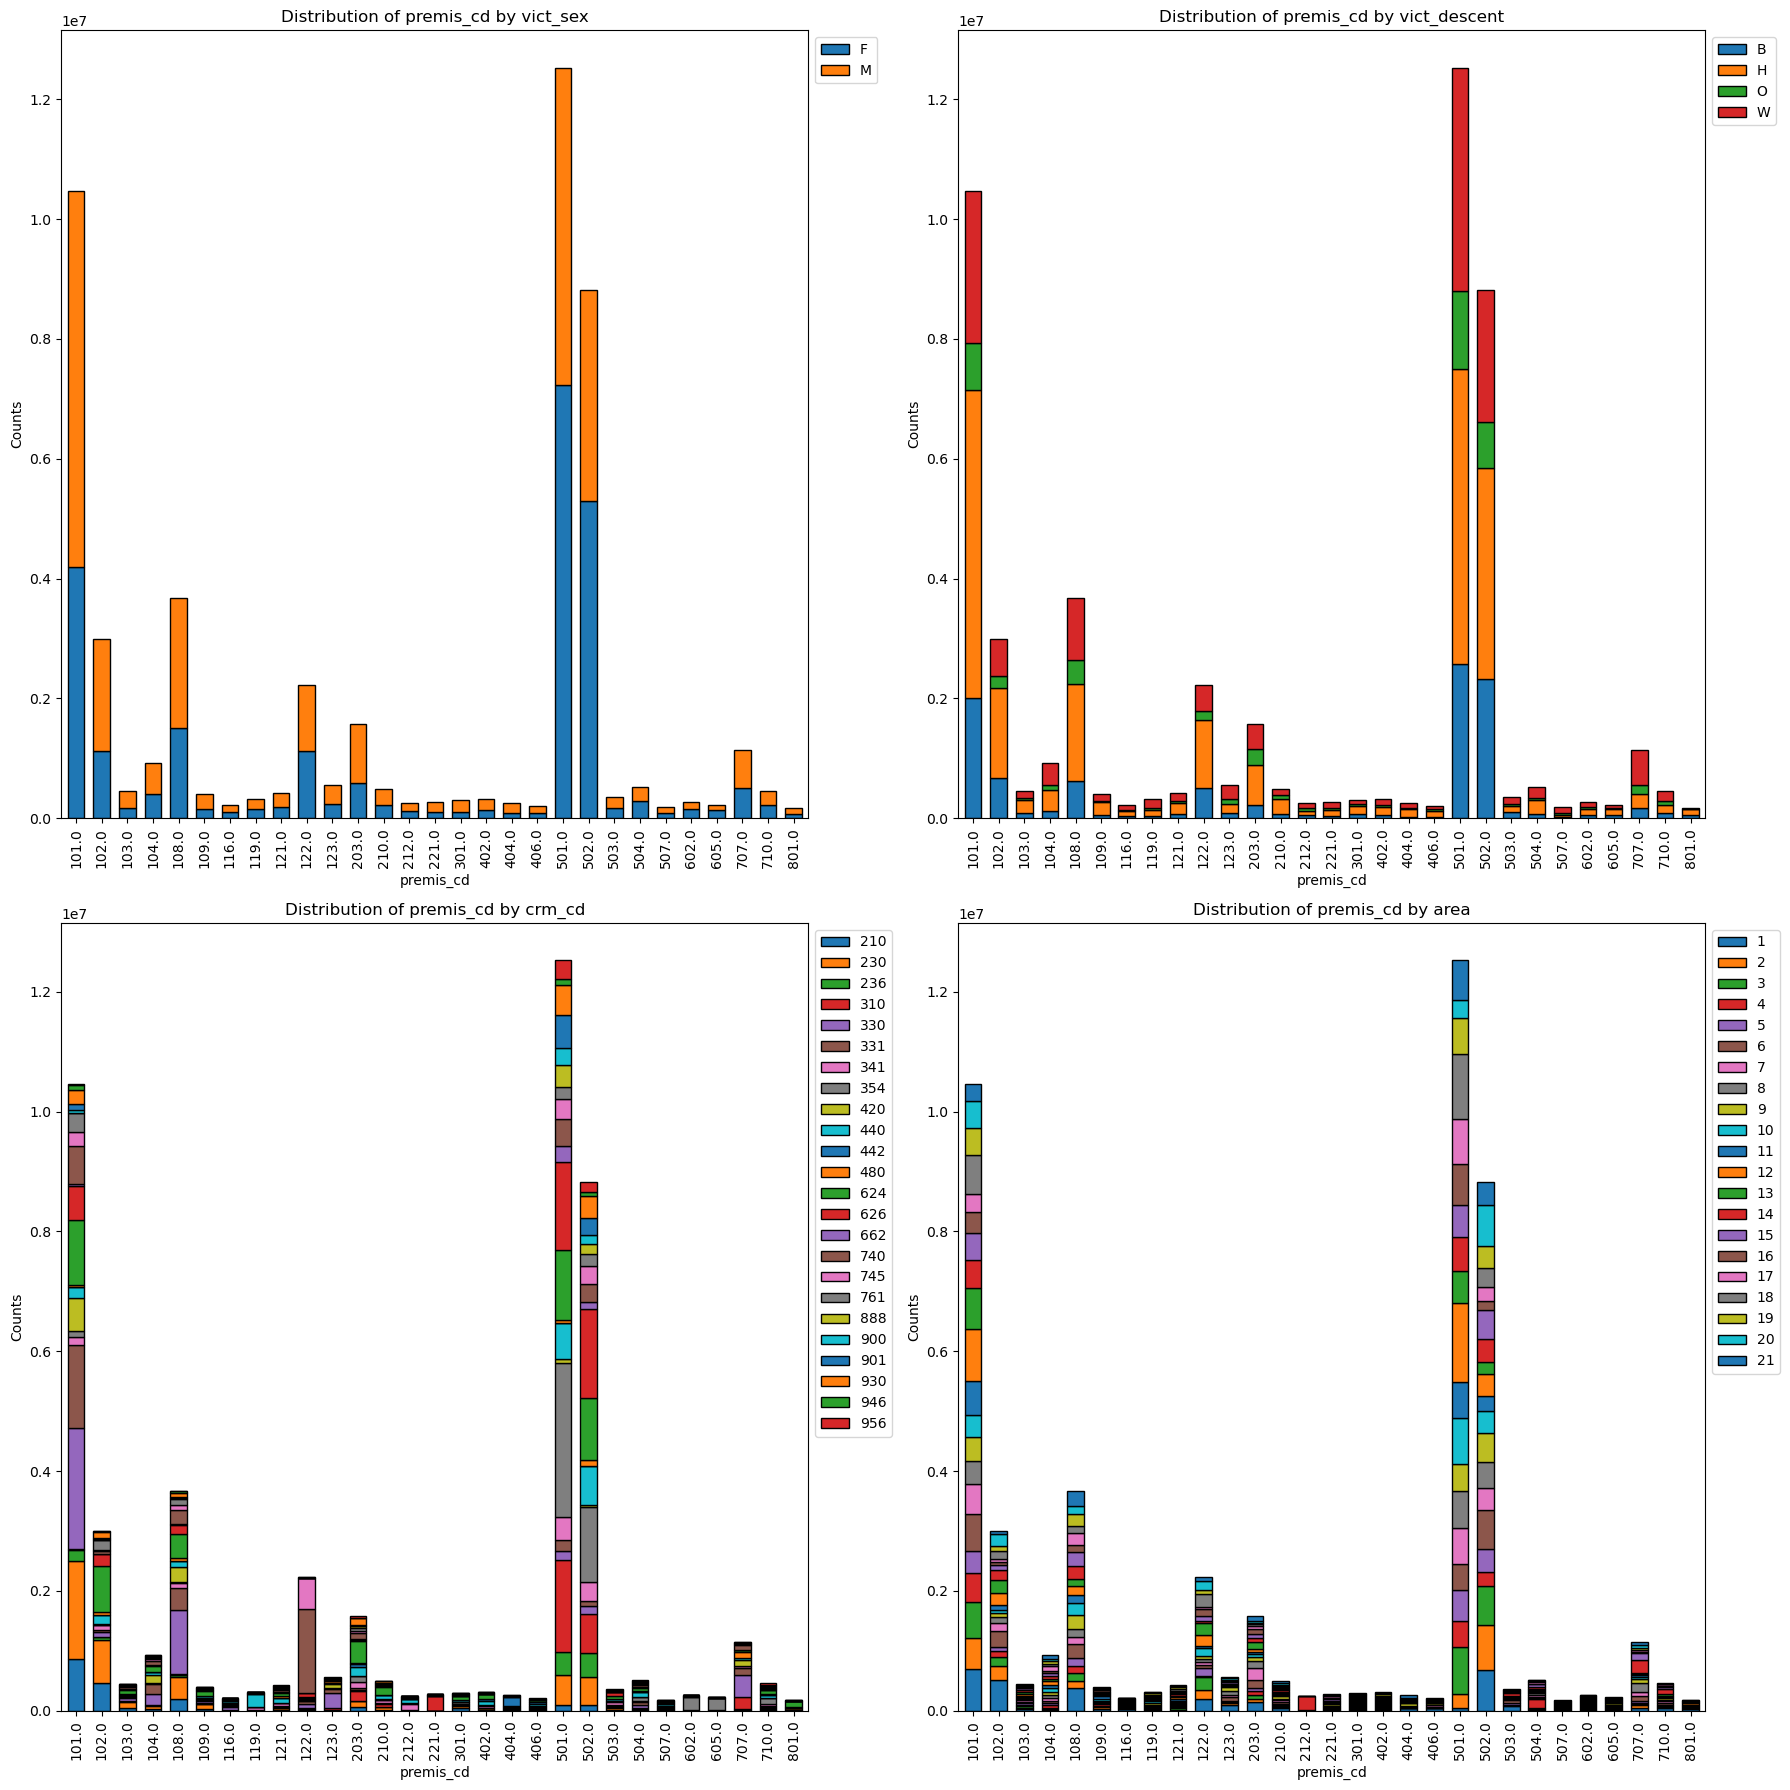

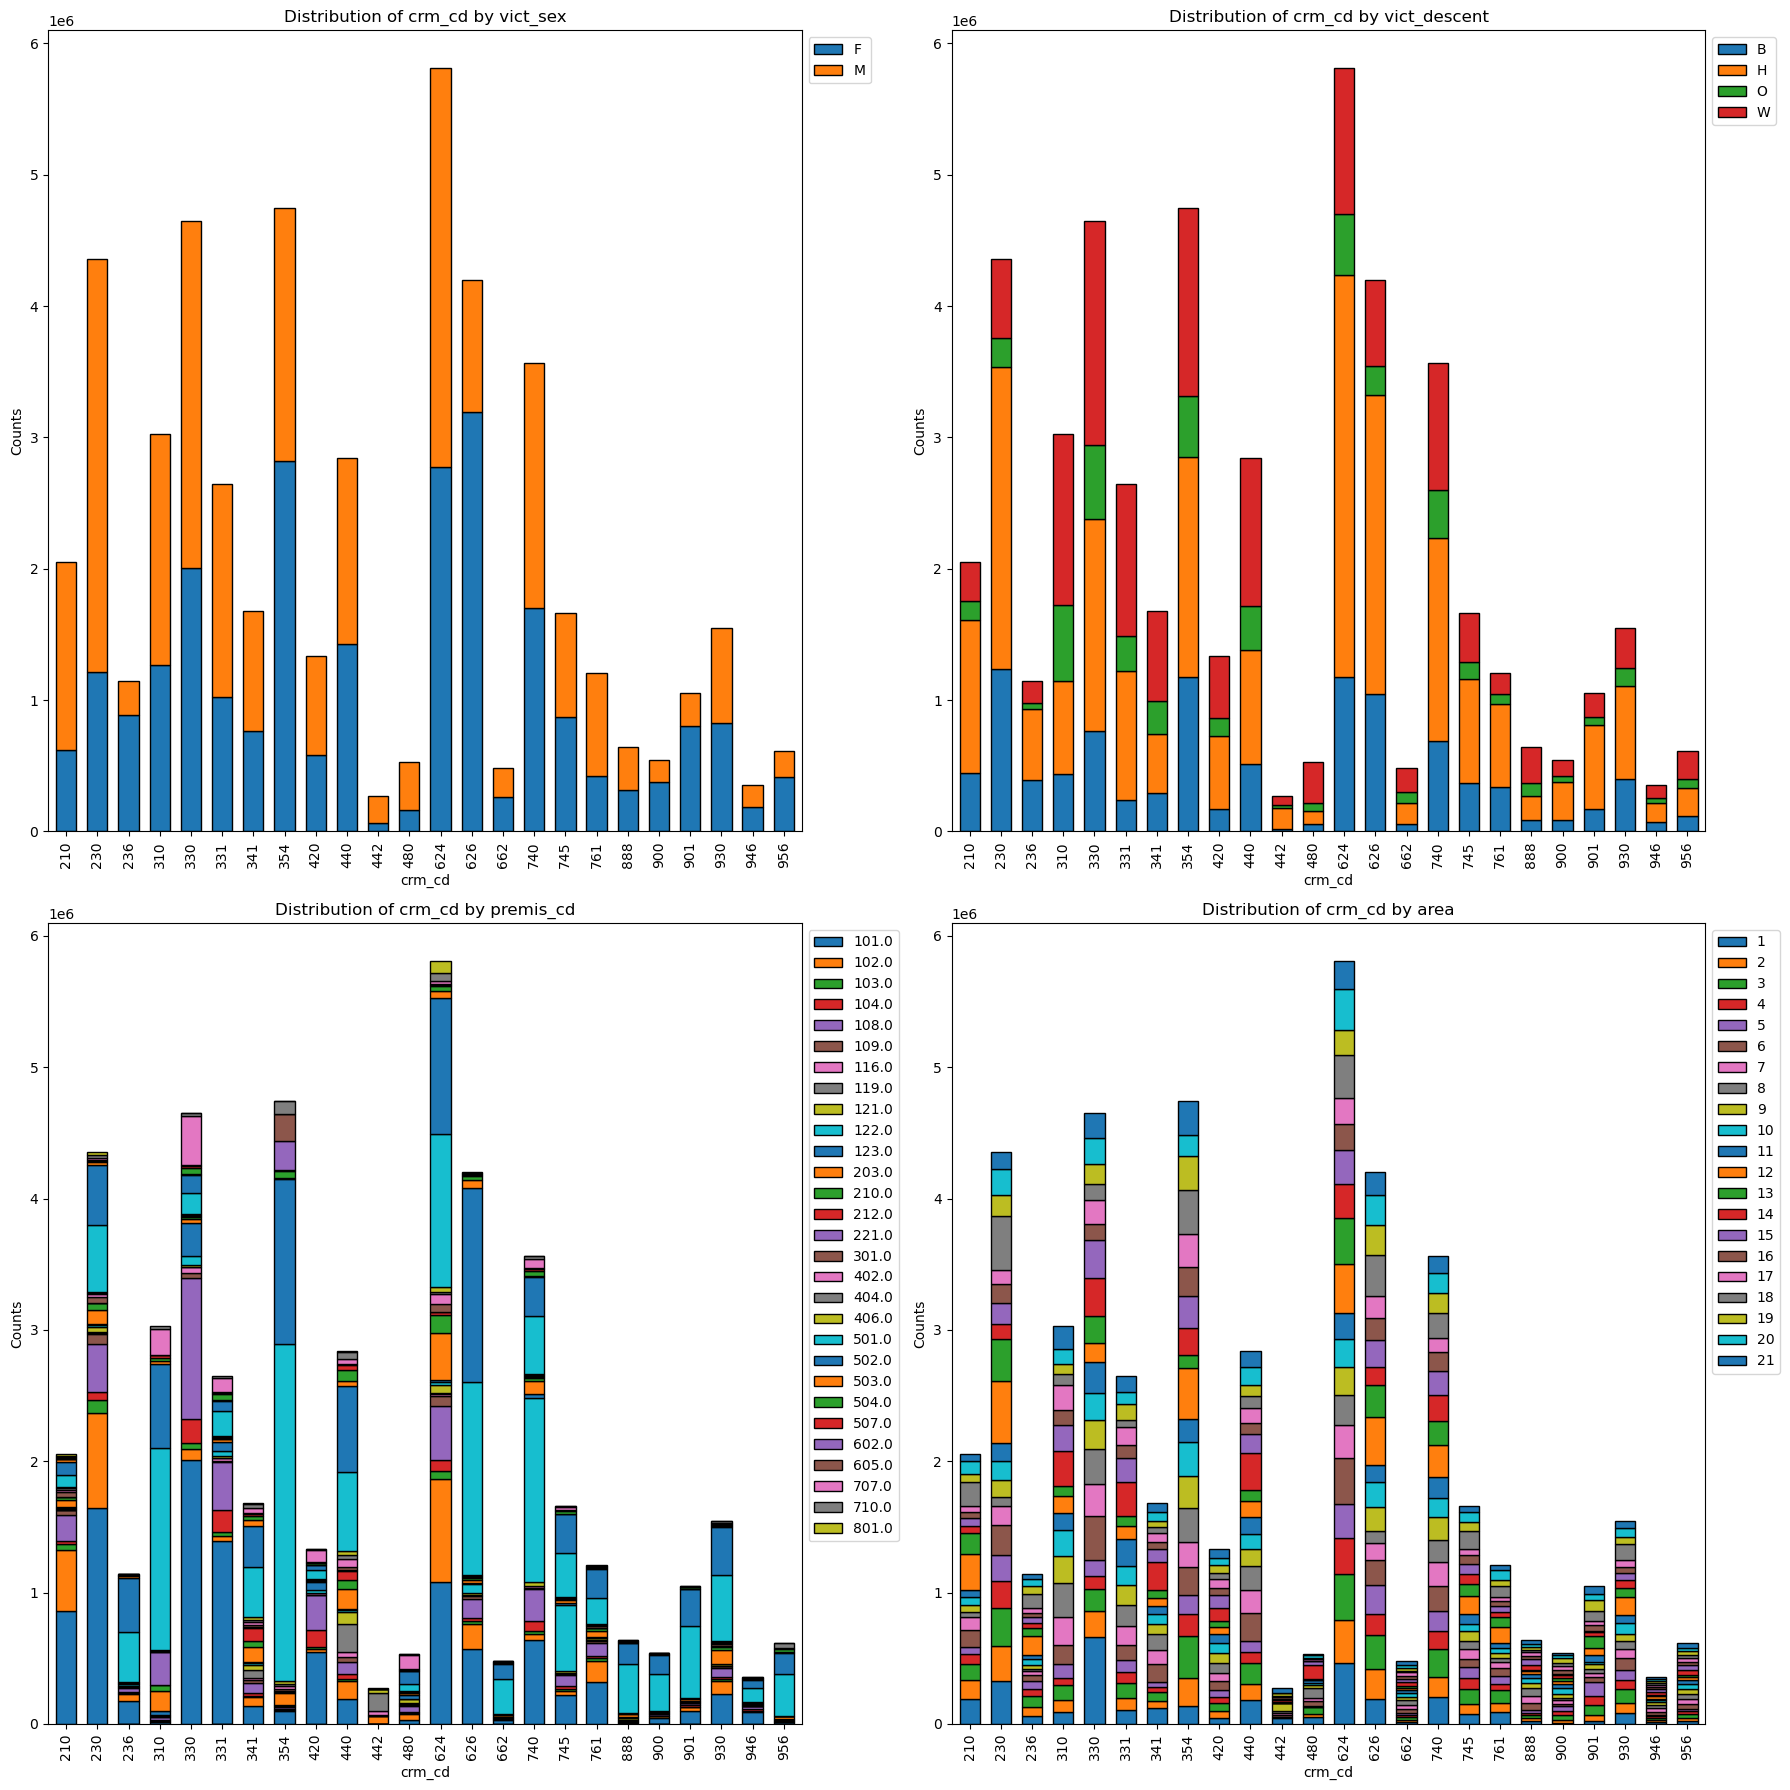

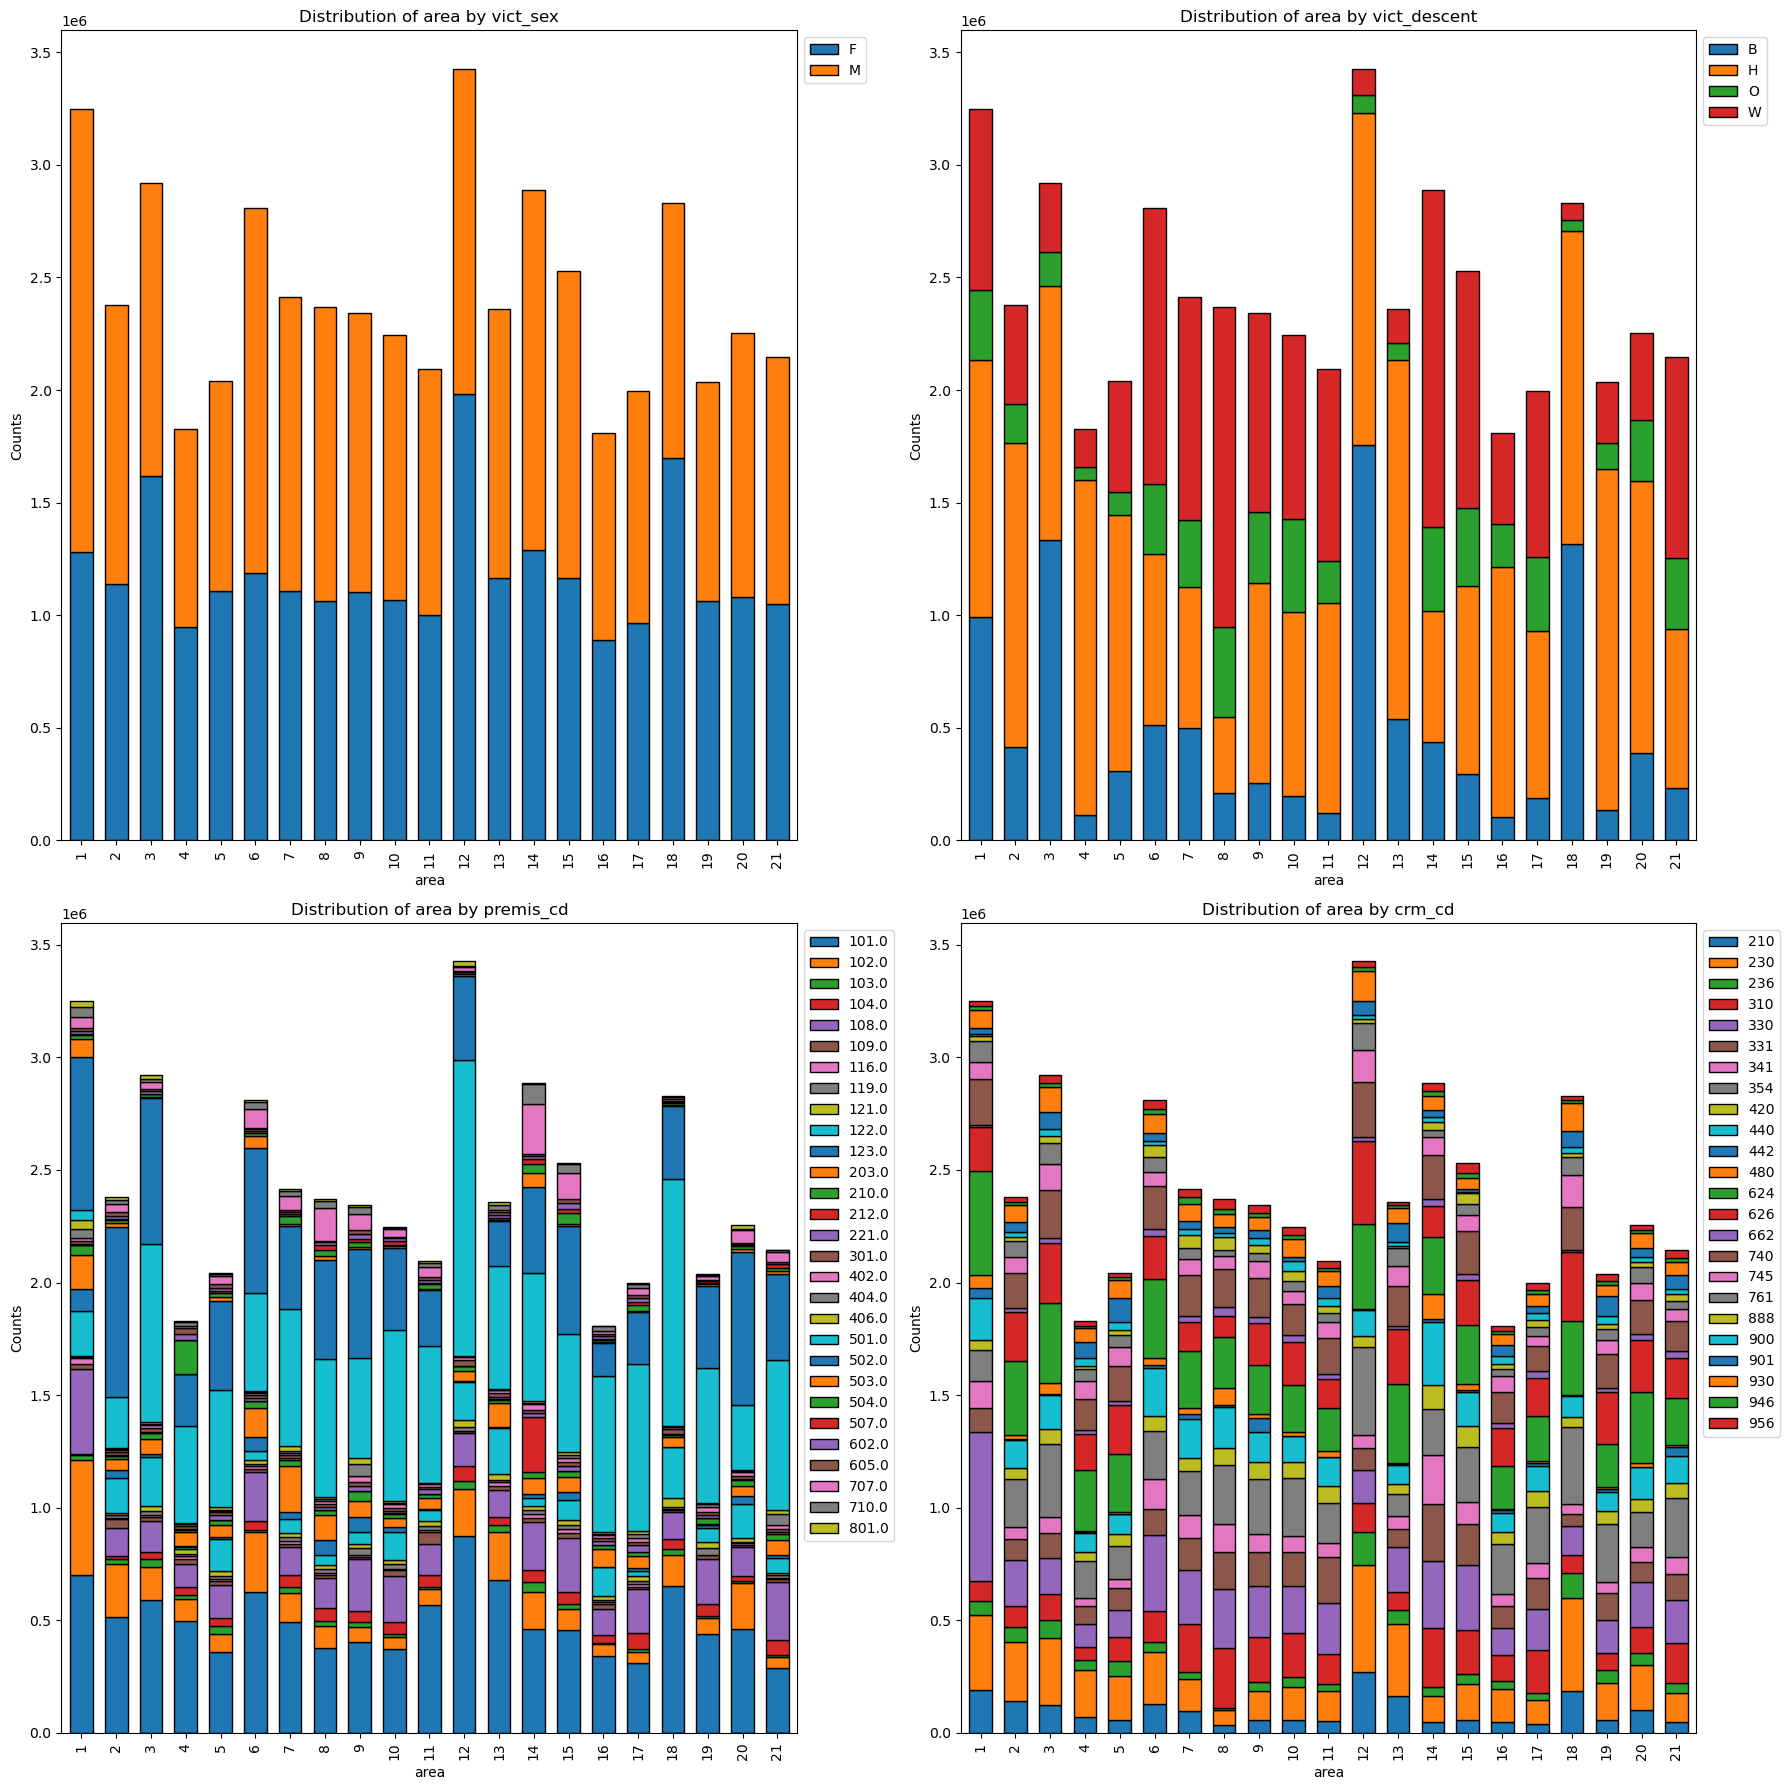

In [117]:
doBarplotWithHue(data=df[cat_cols], normalize=False)

### Stacked barplots for each categorical feature vs other categorical features (Normalized)
The y-axis is the percentage of each combination for the feature in x-axis.

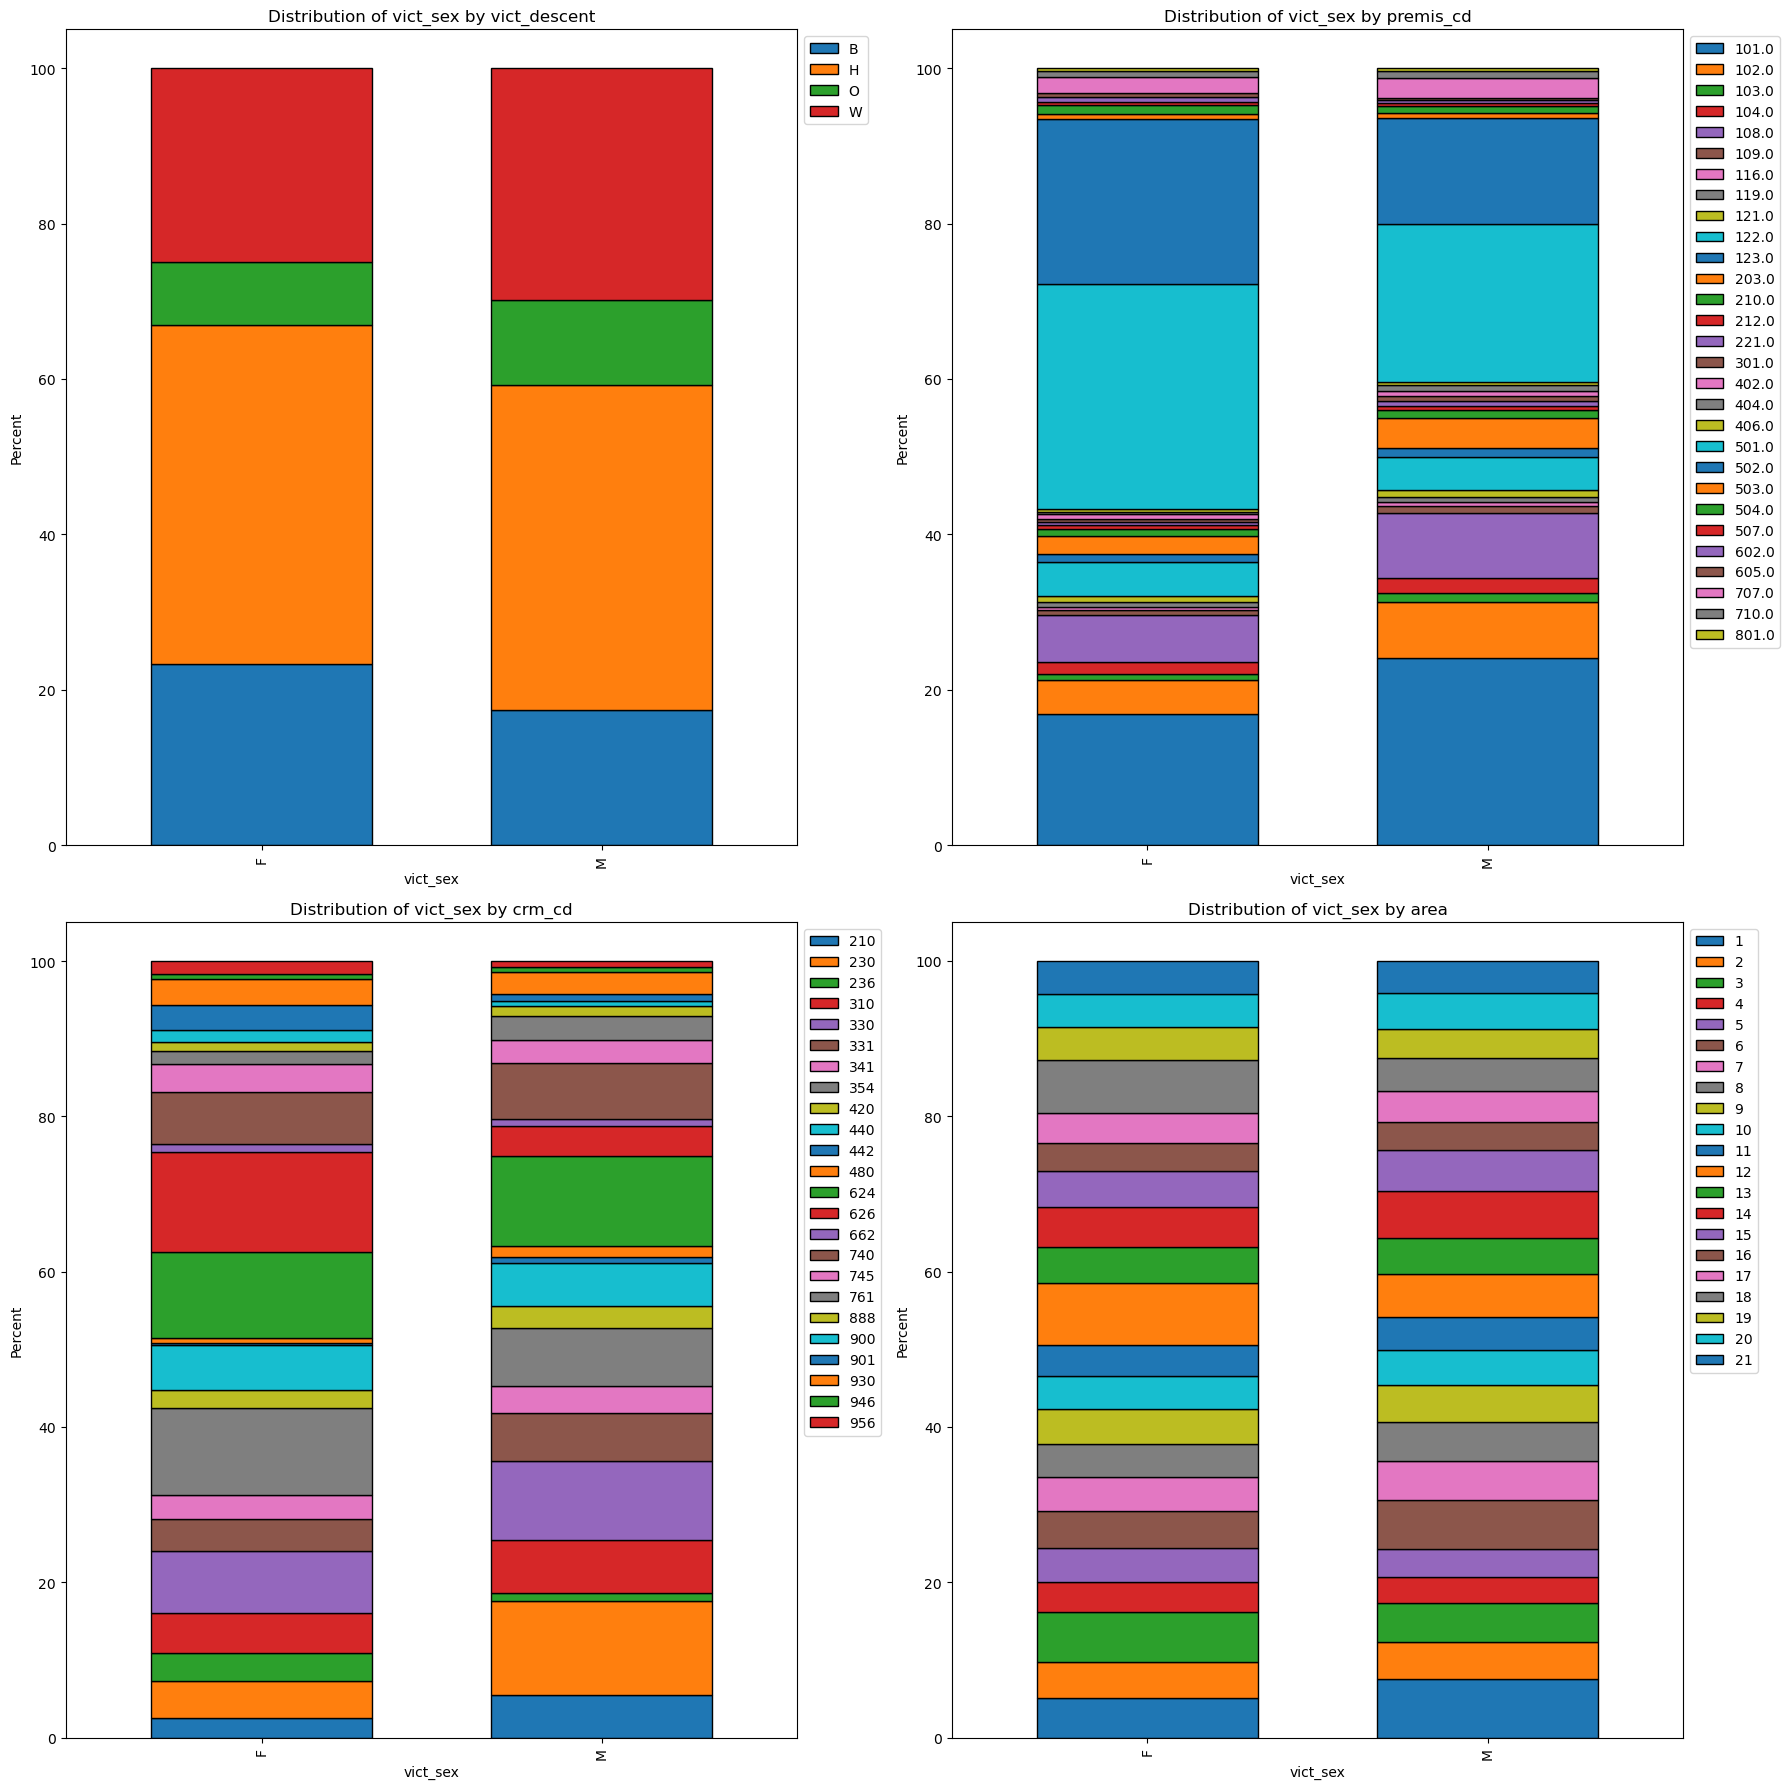

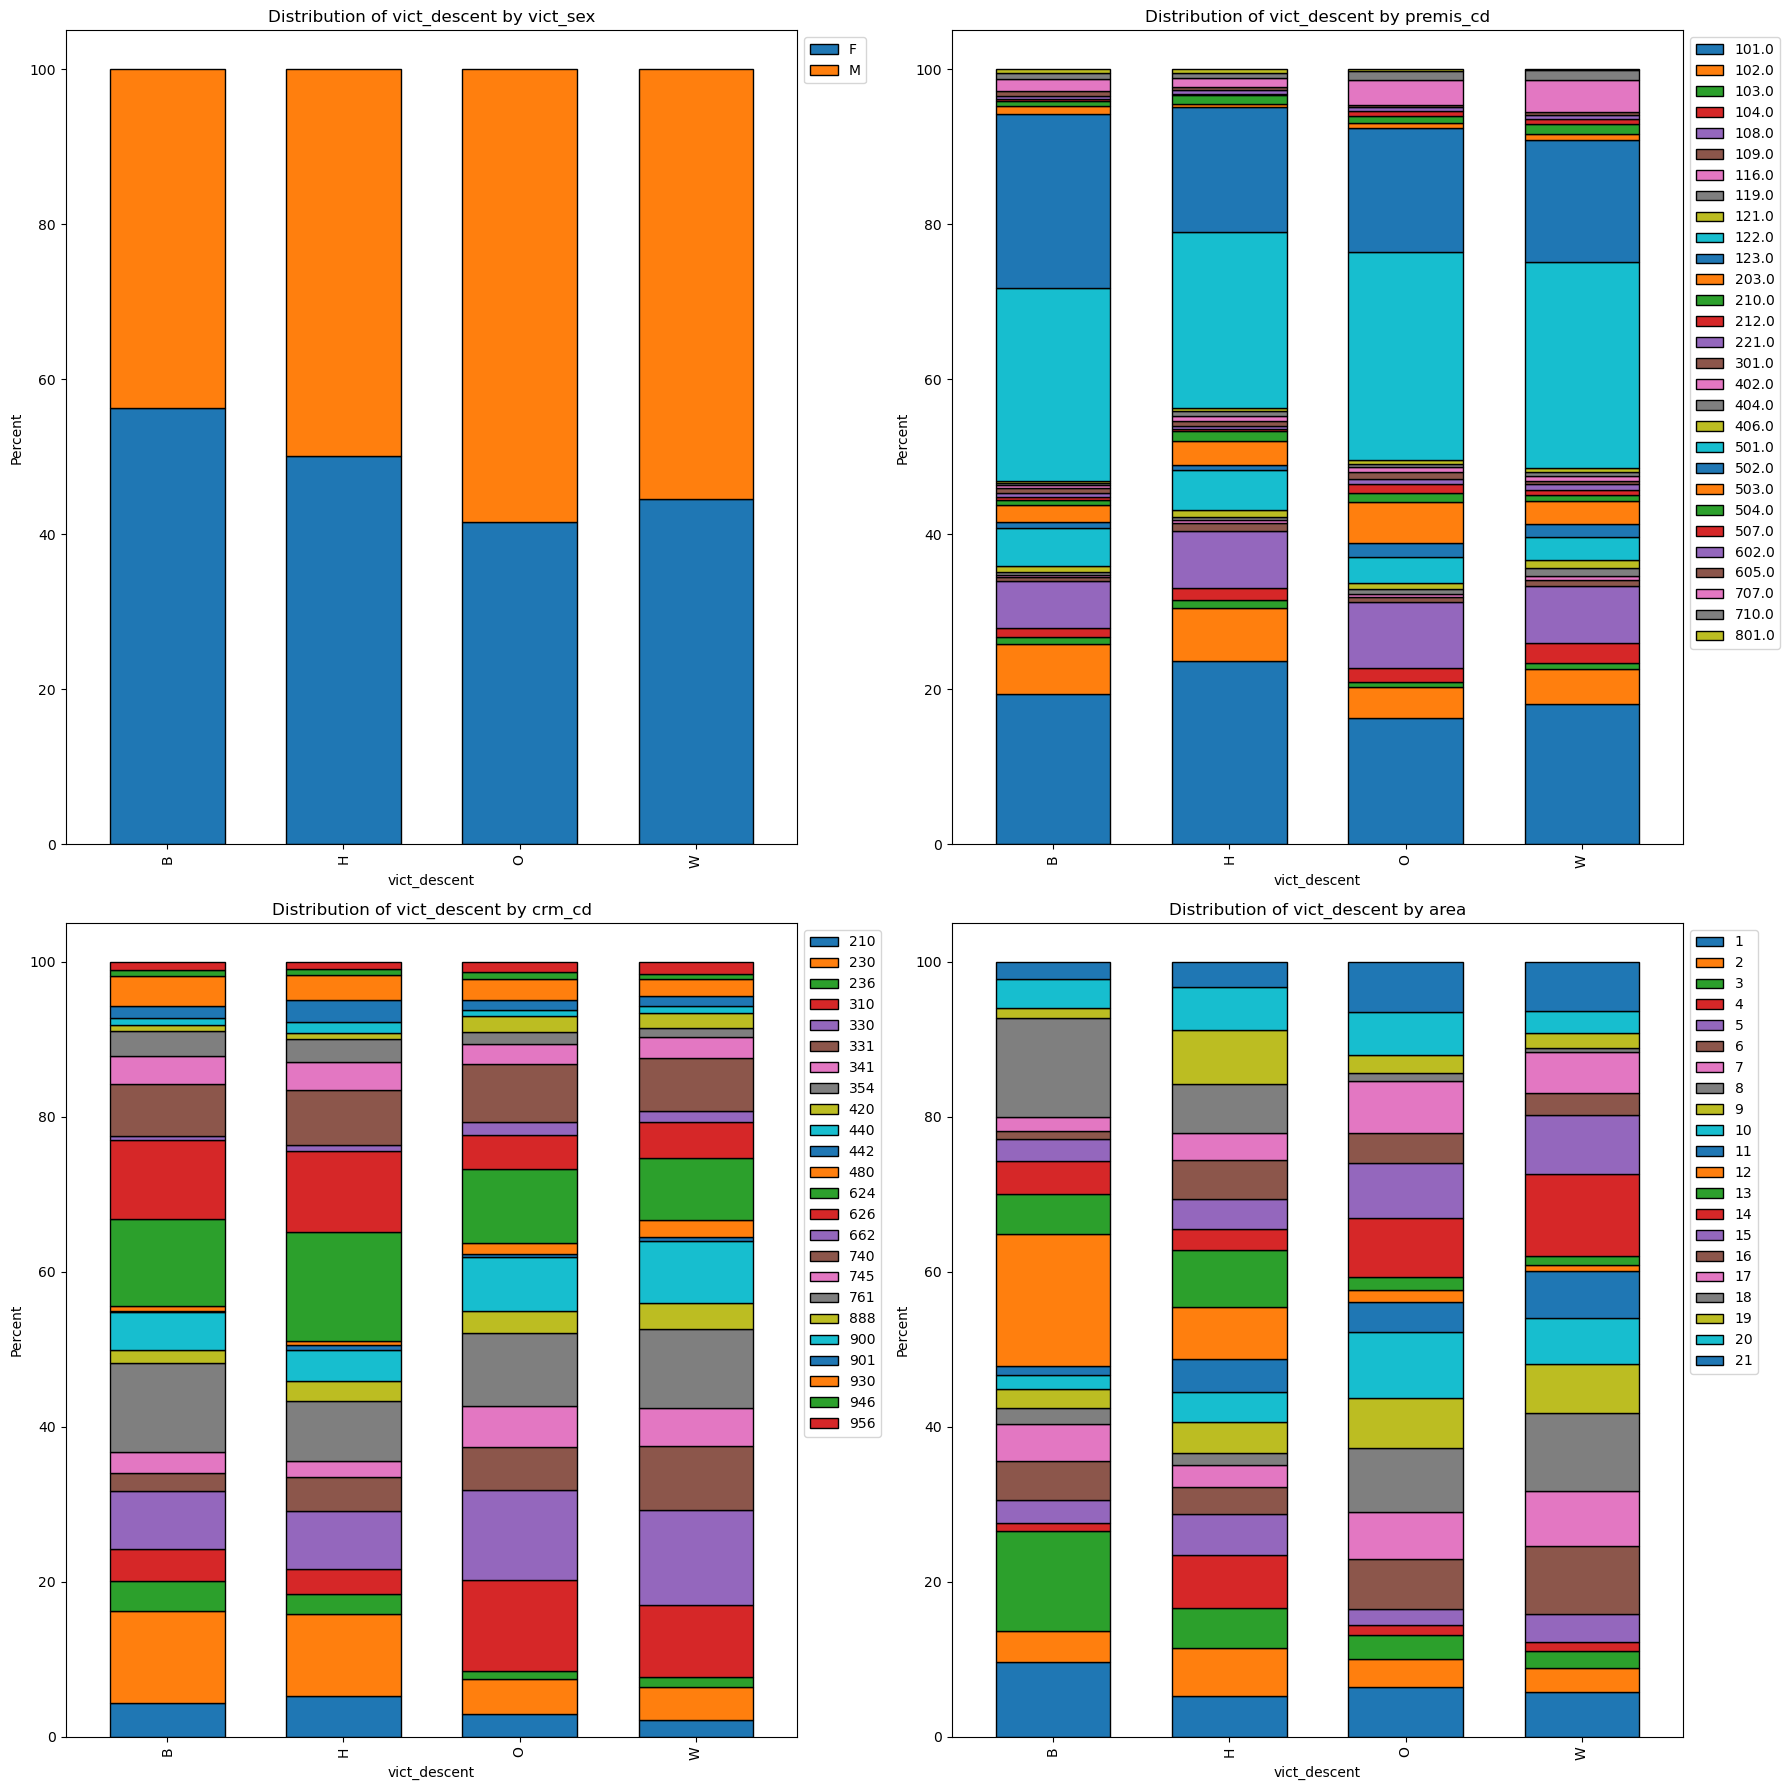

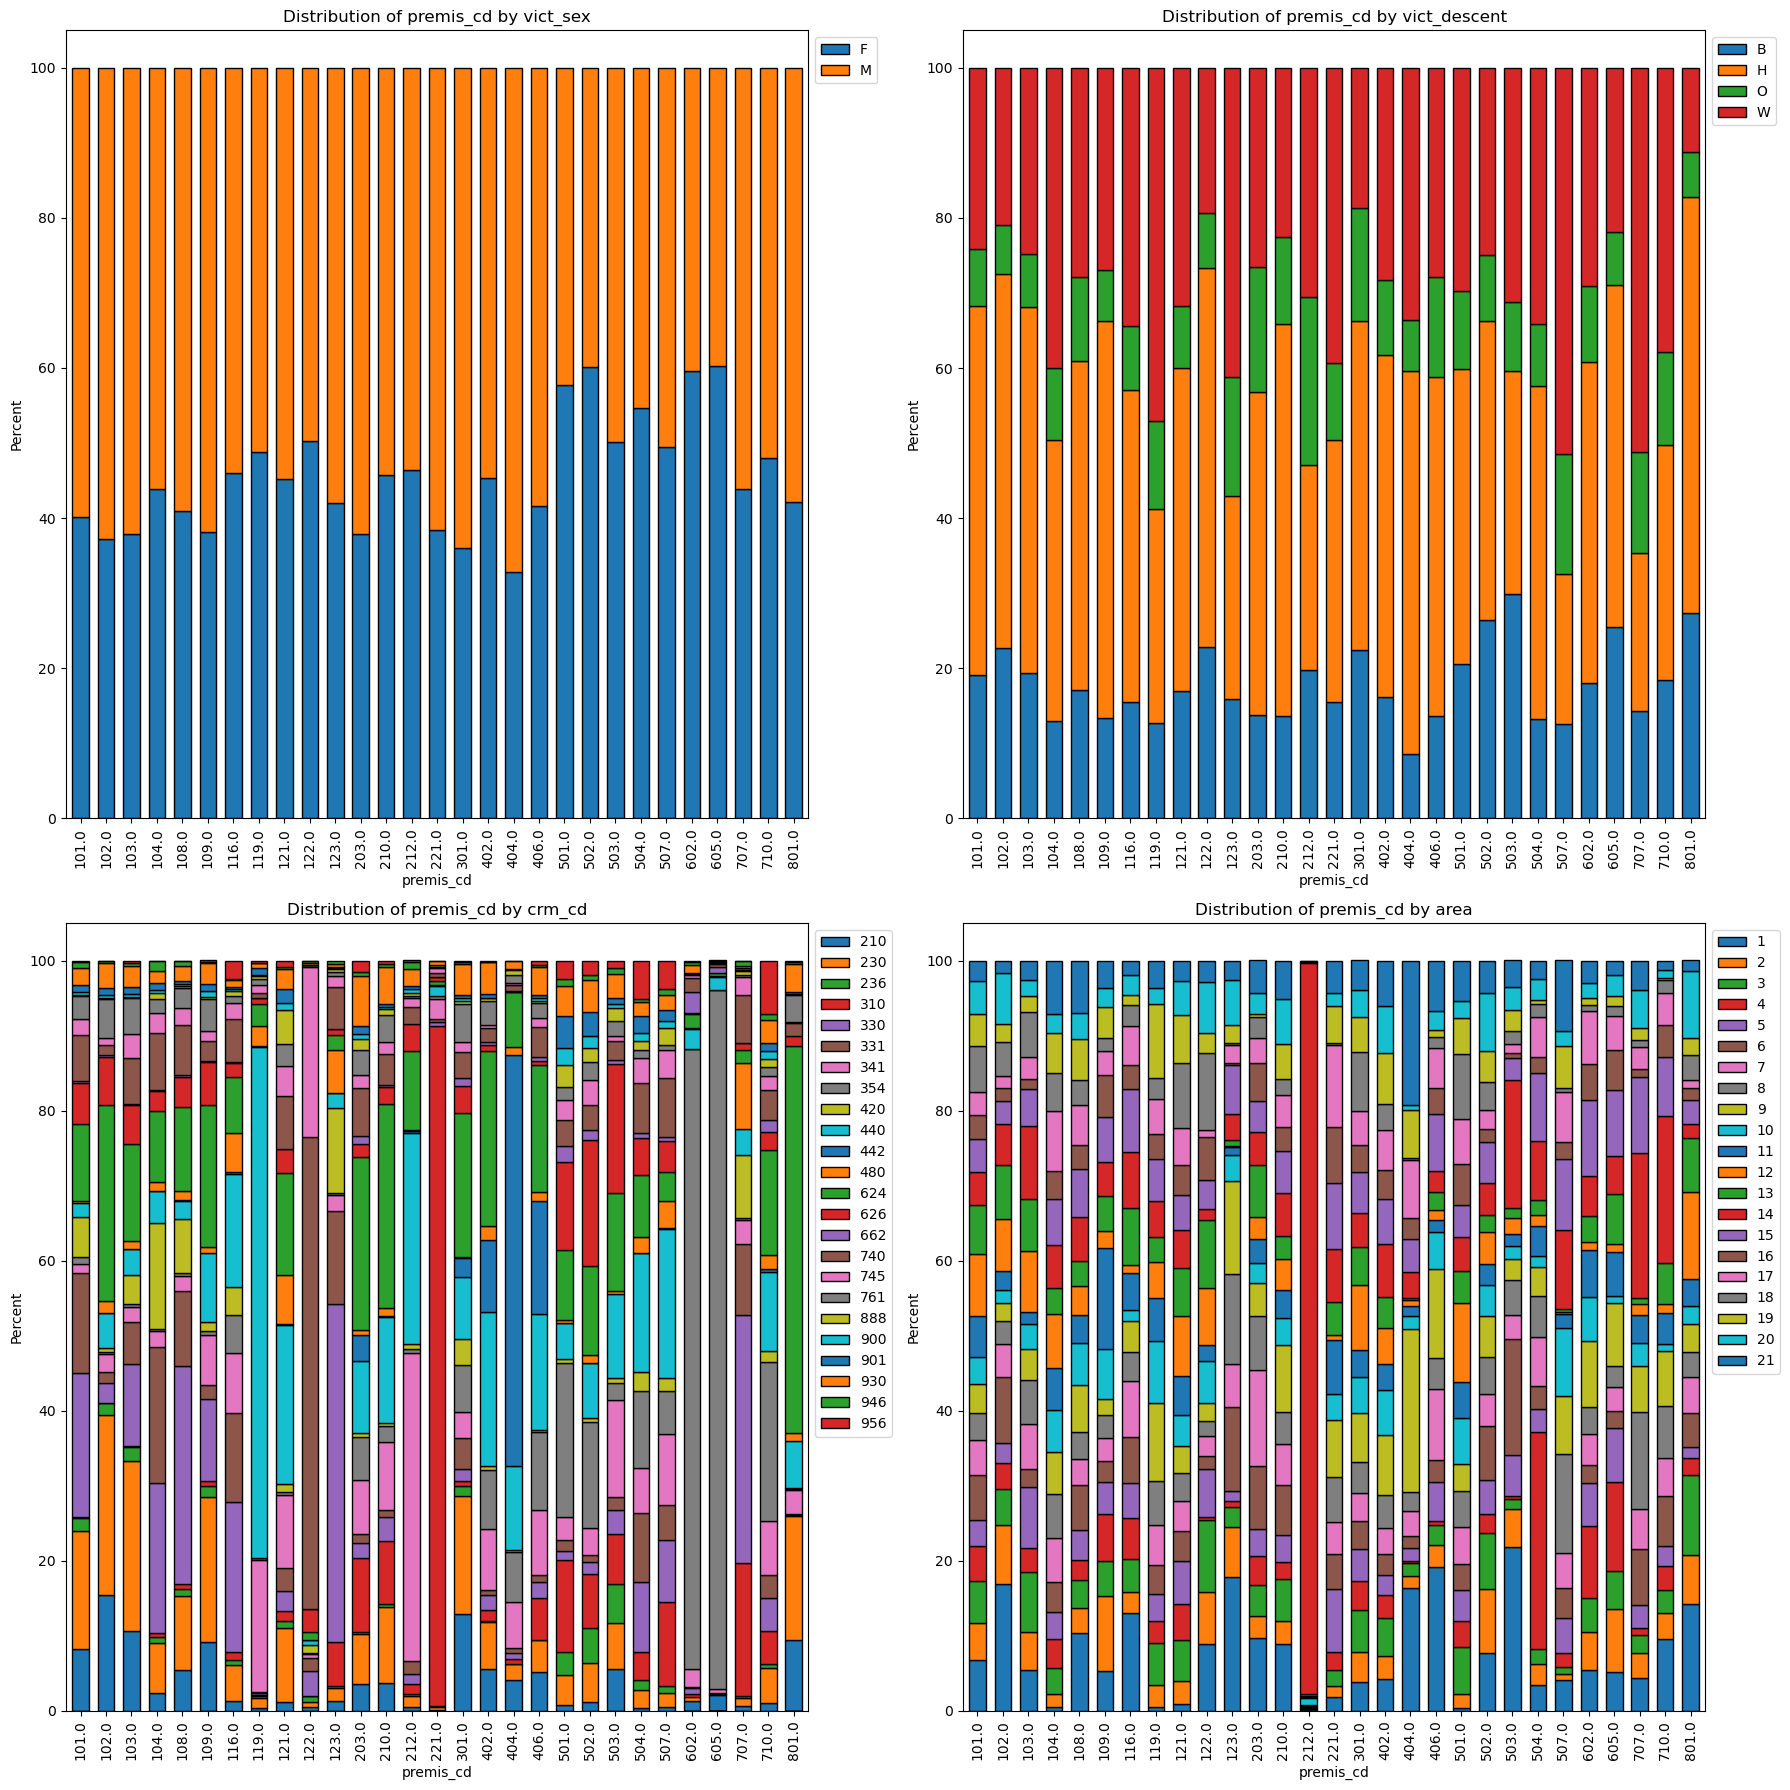

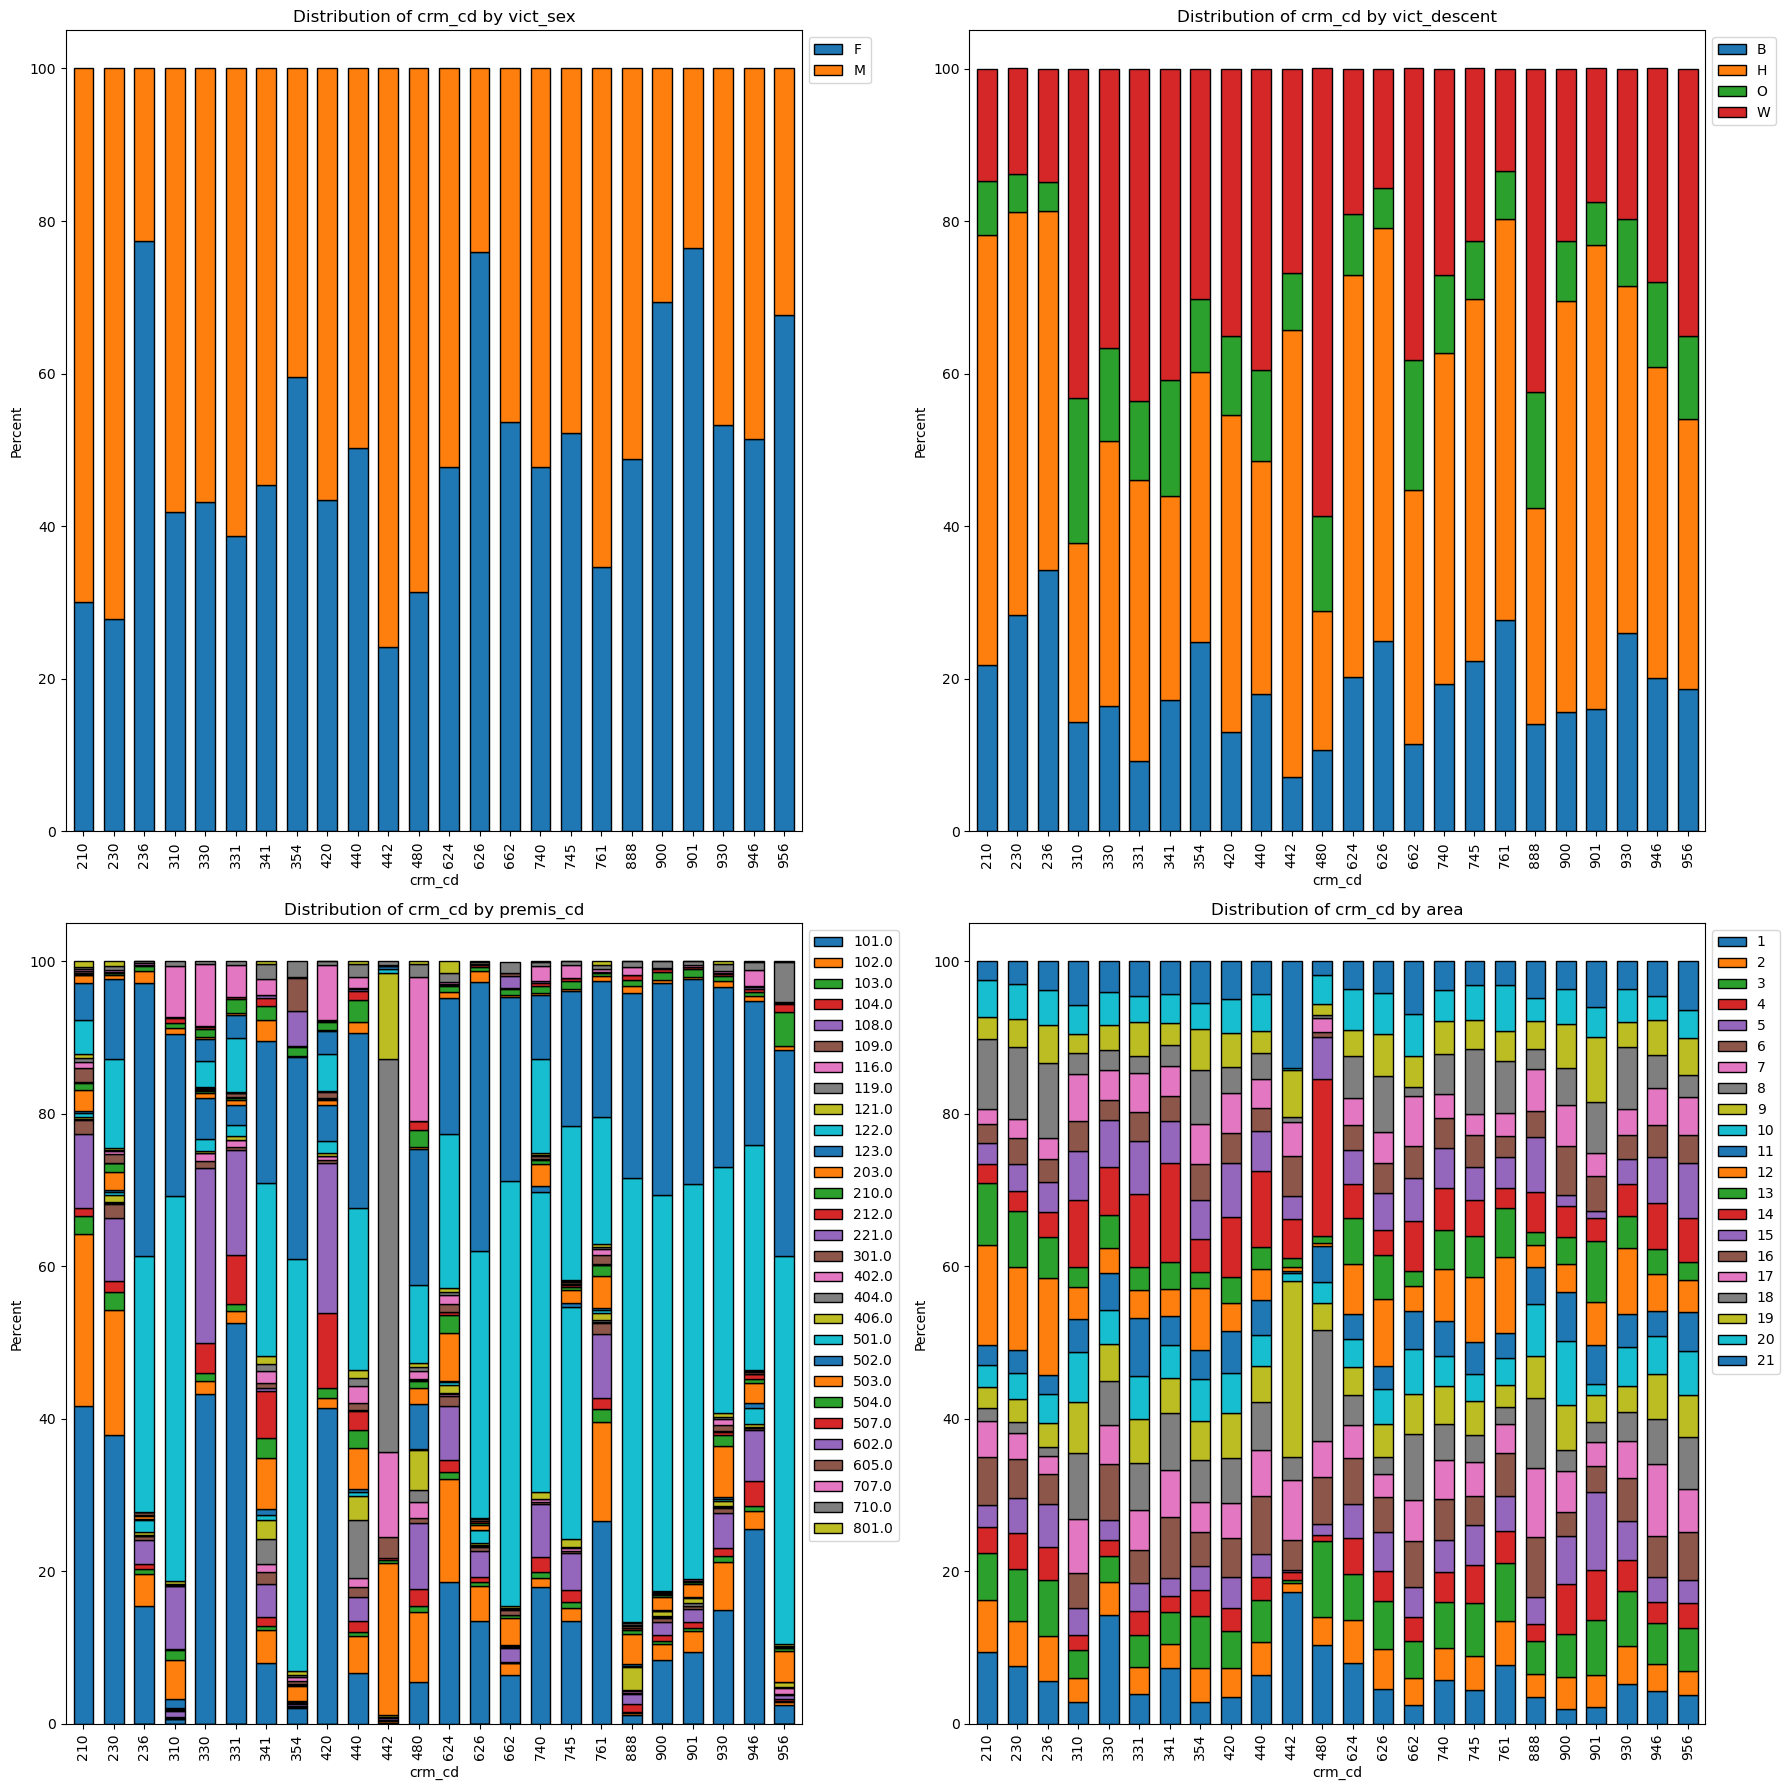

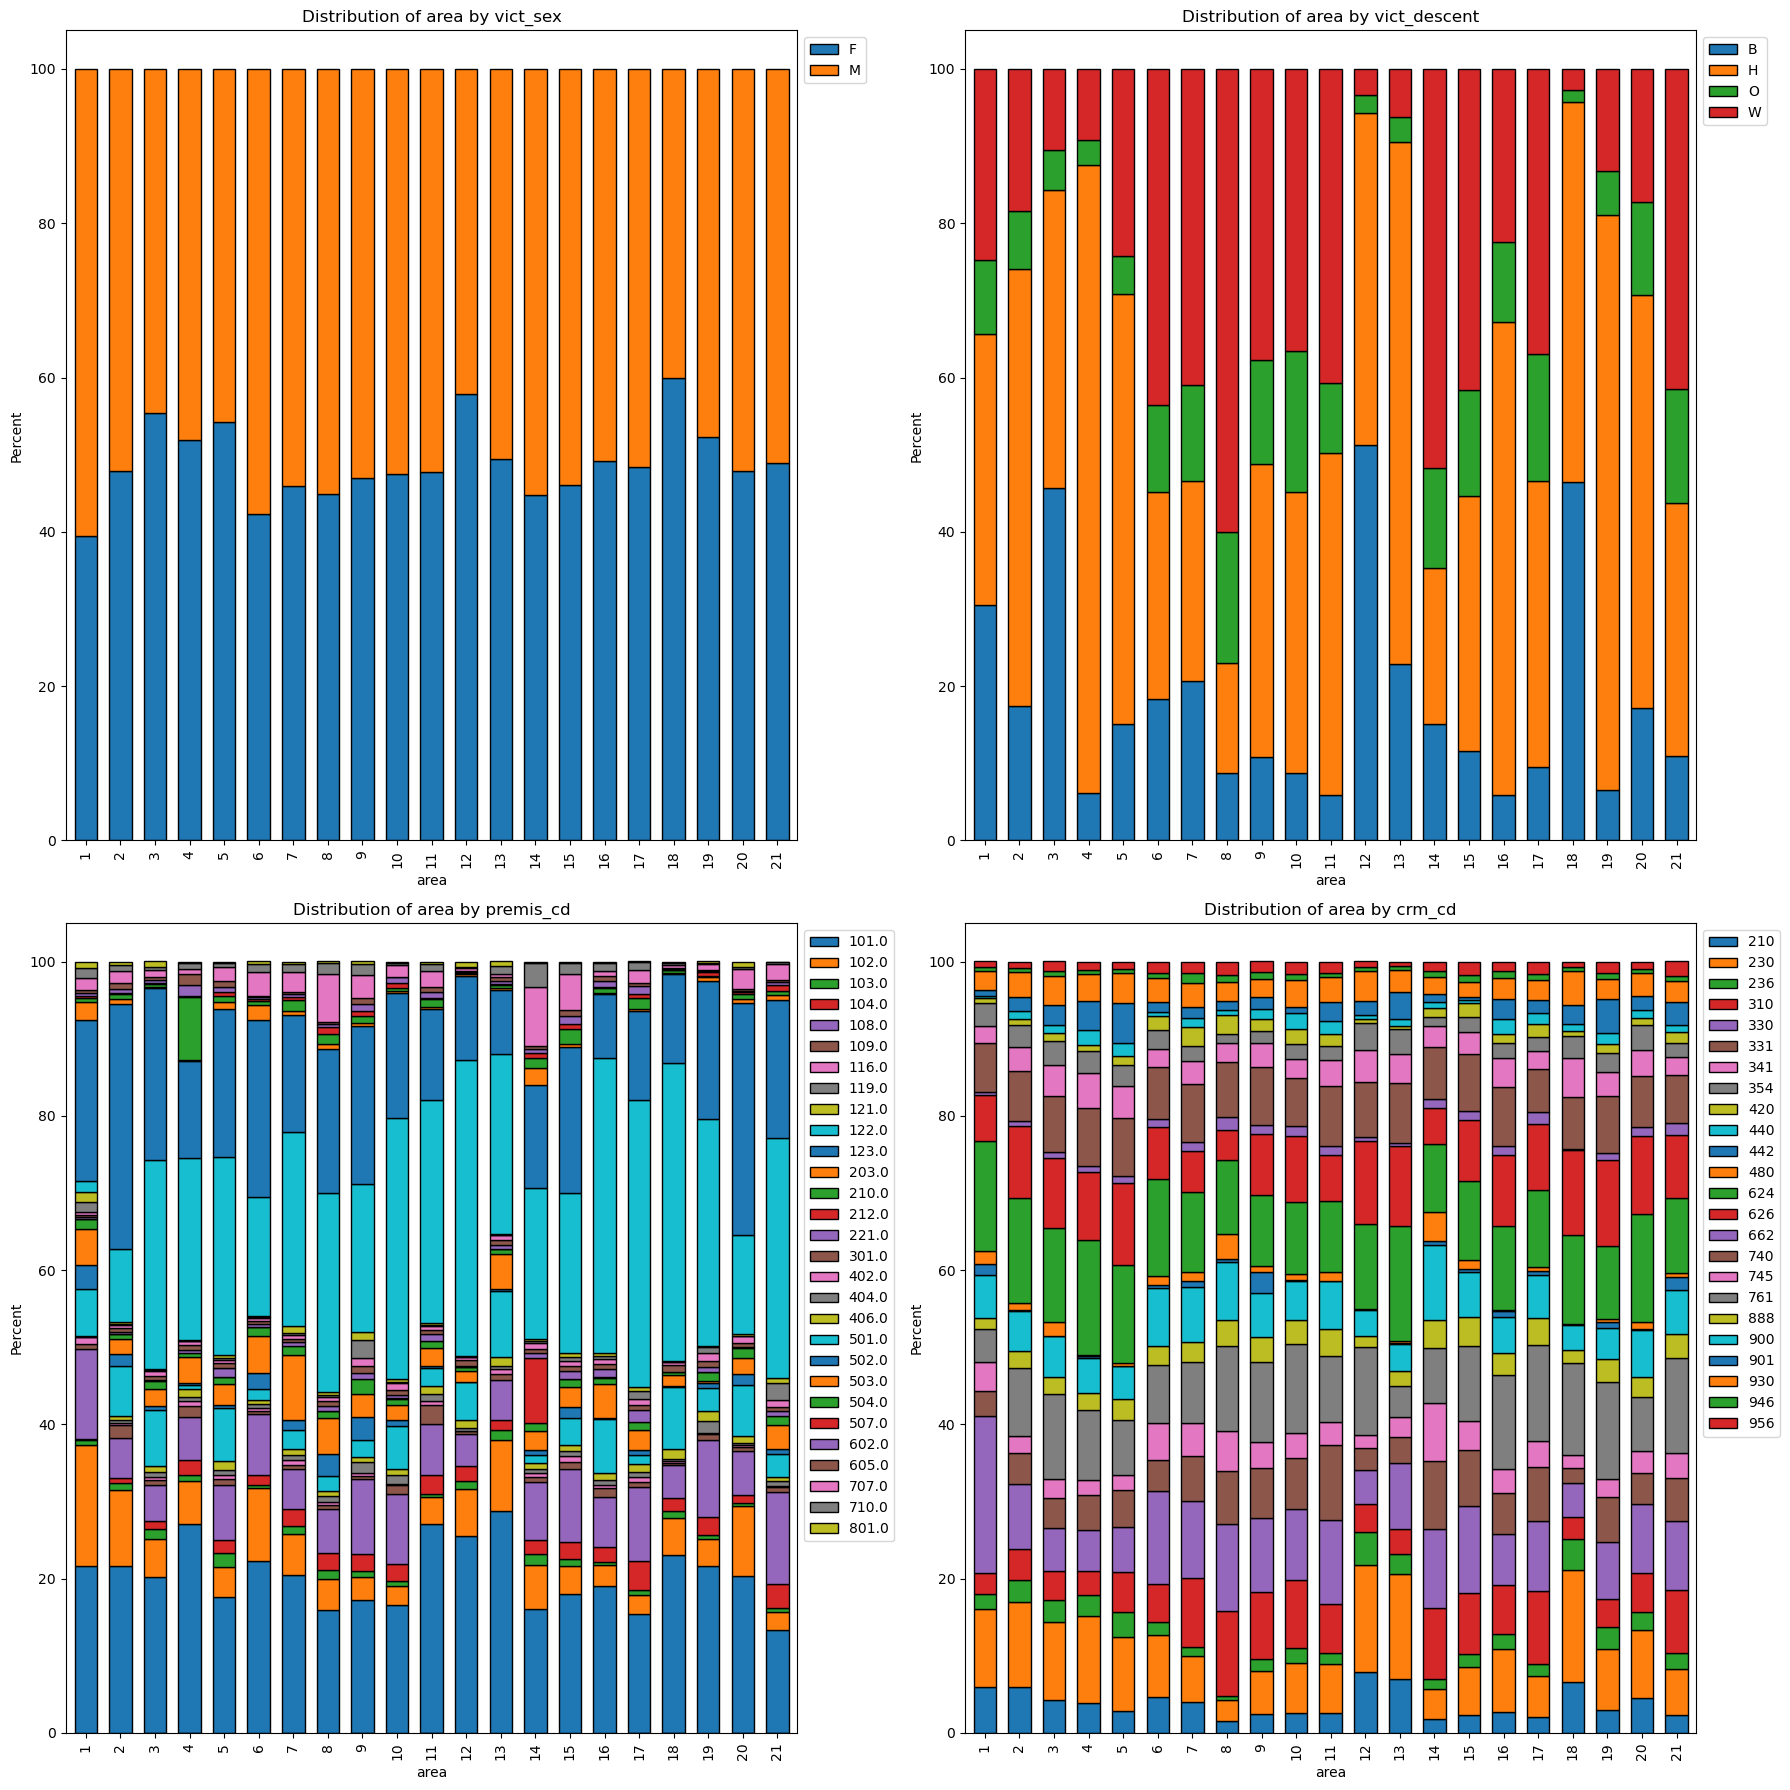

In [118]:
doBarplotWithHue(data=df[cat_cols], normalize=True)

### Heatmap for each categorical feature vs other categorical features
Colorbar is the number of combinations for the features in x and y axis

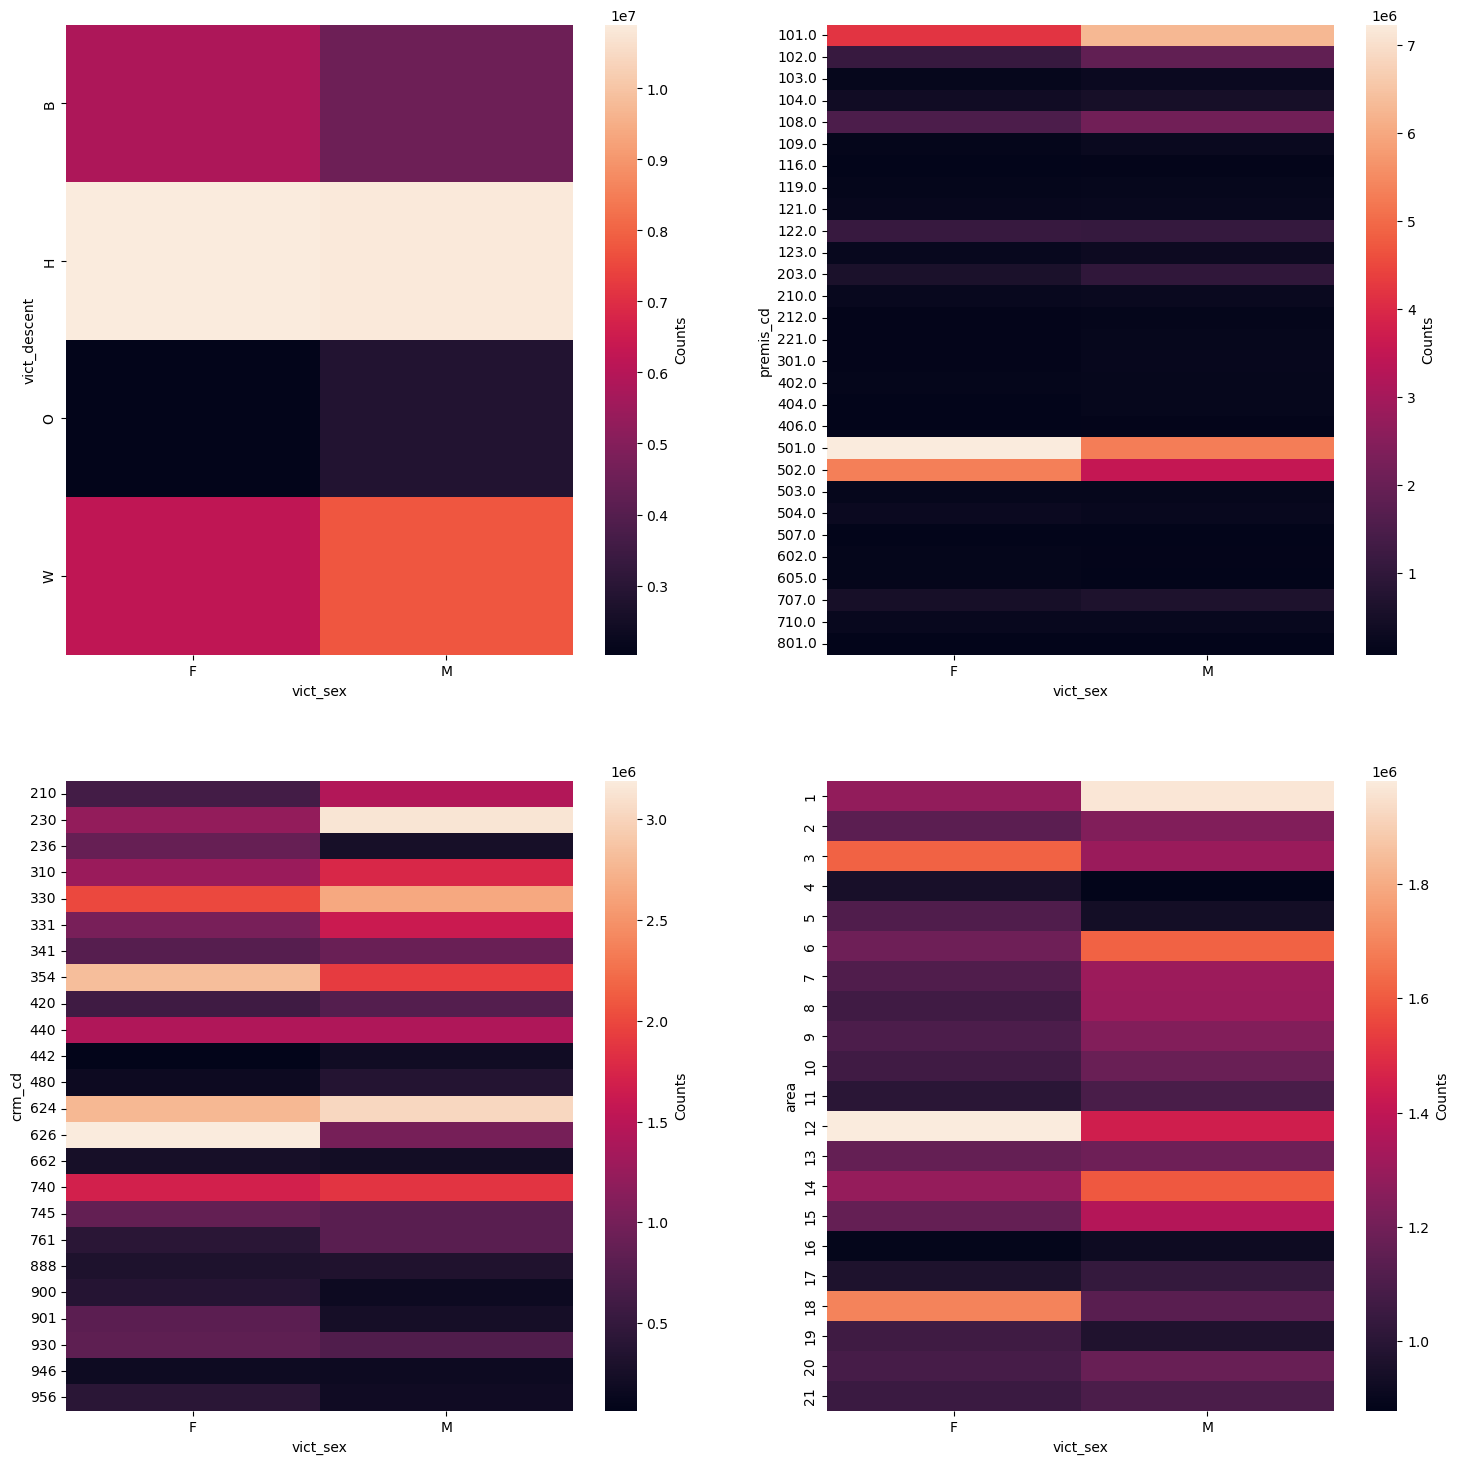

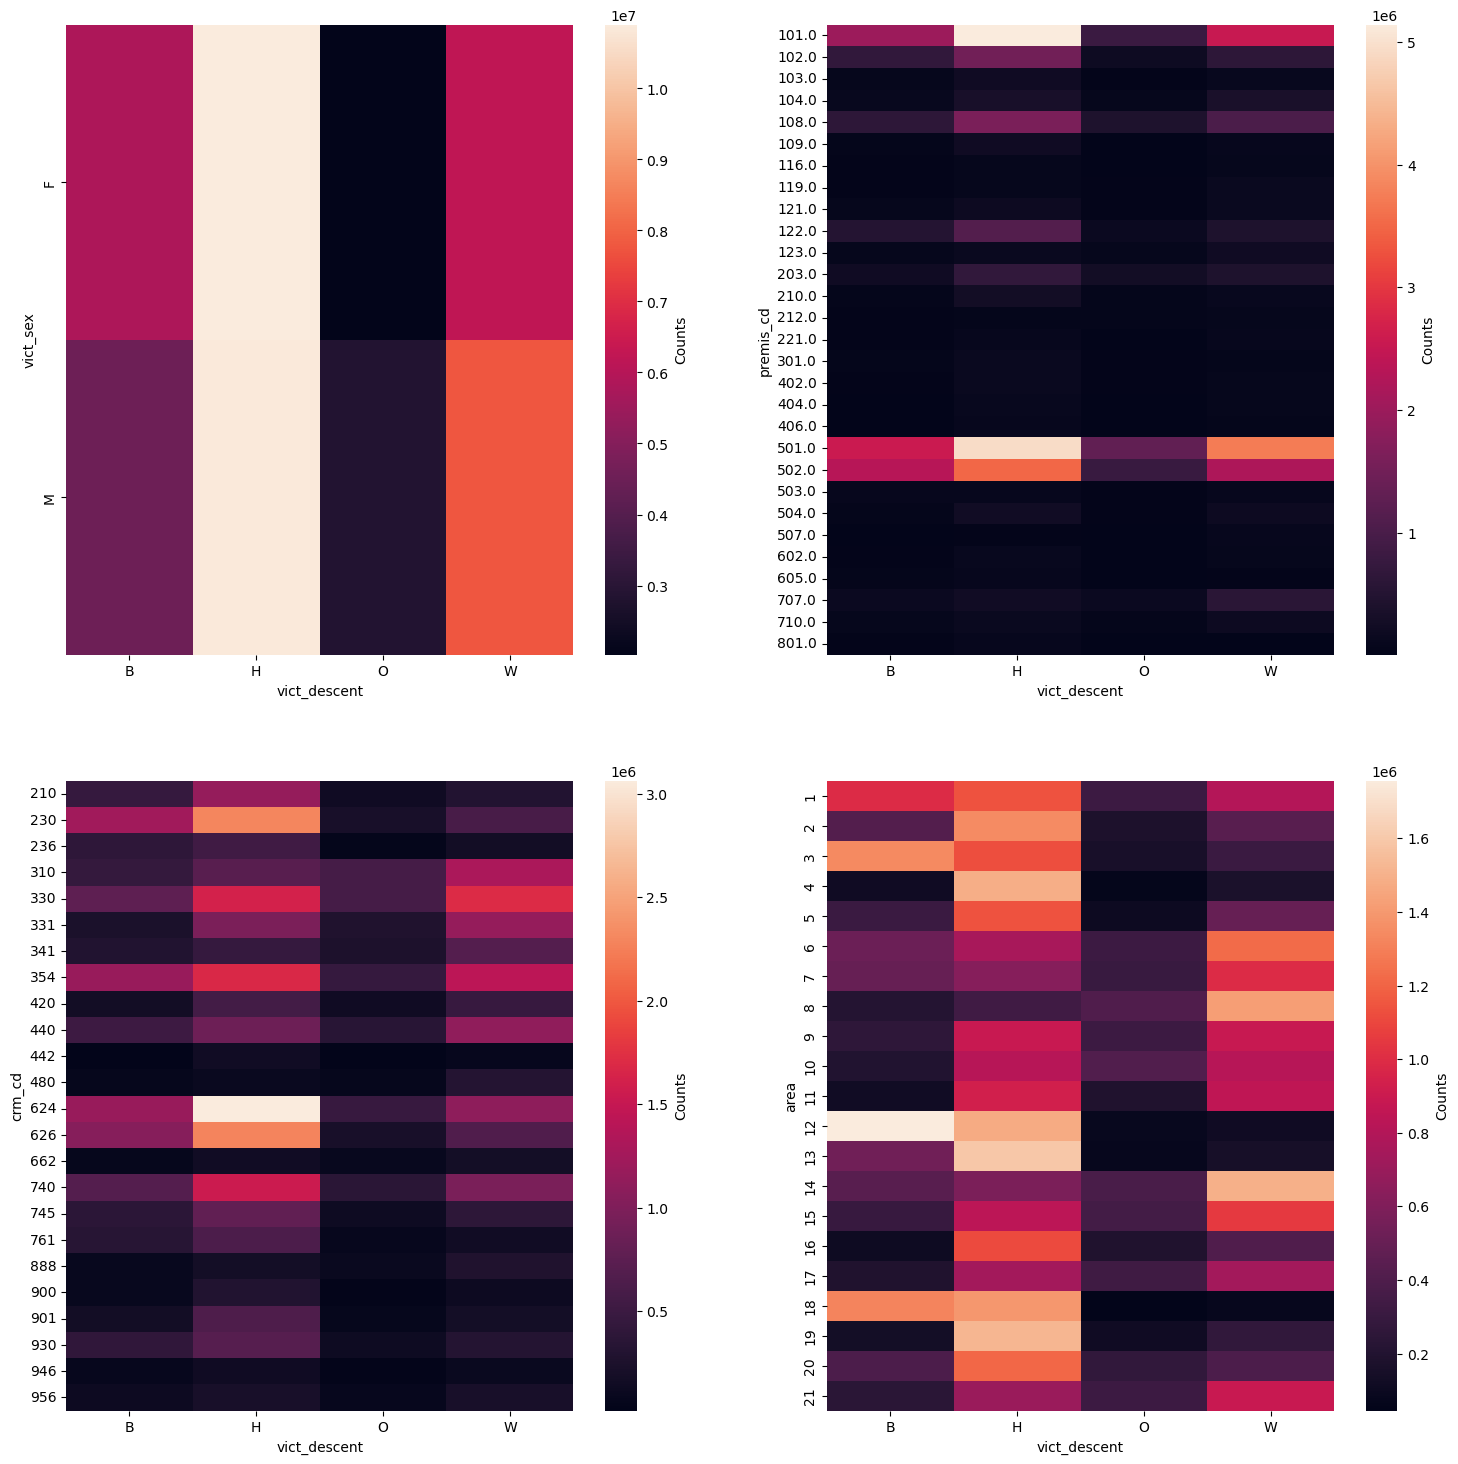

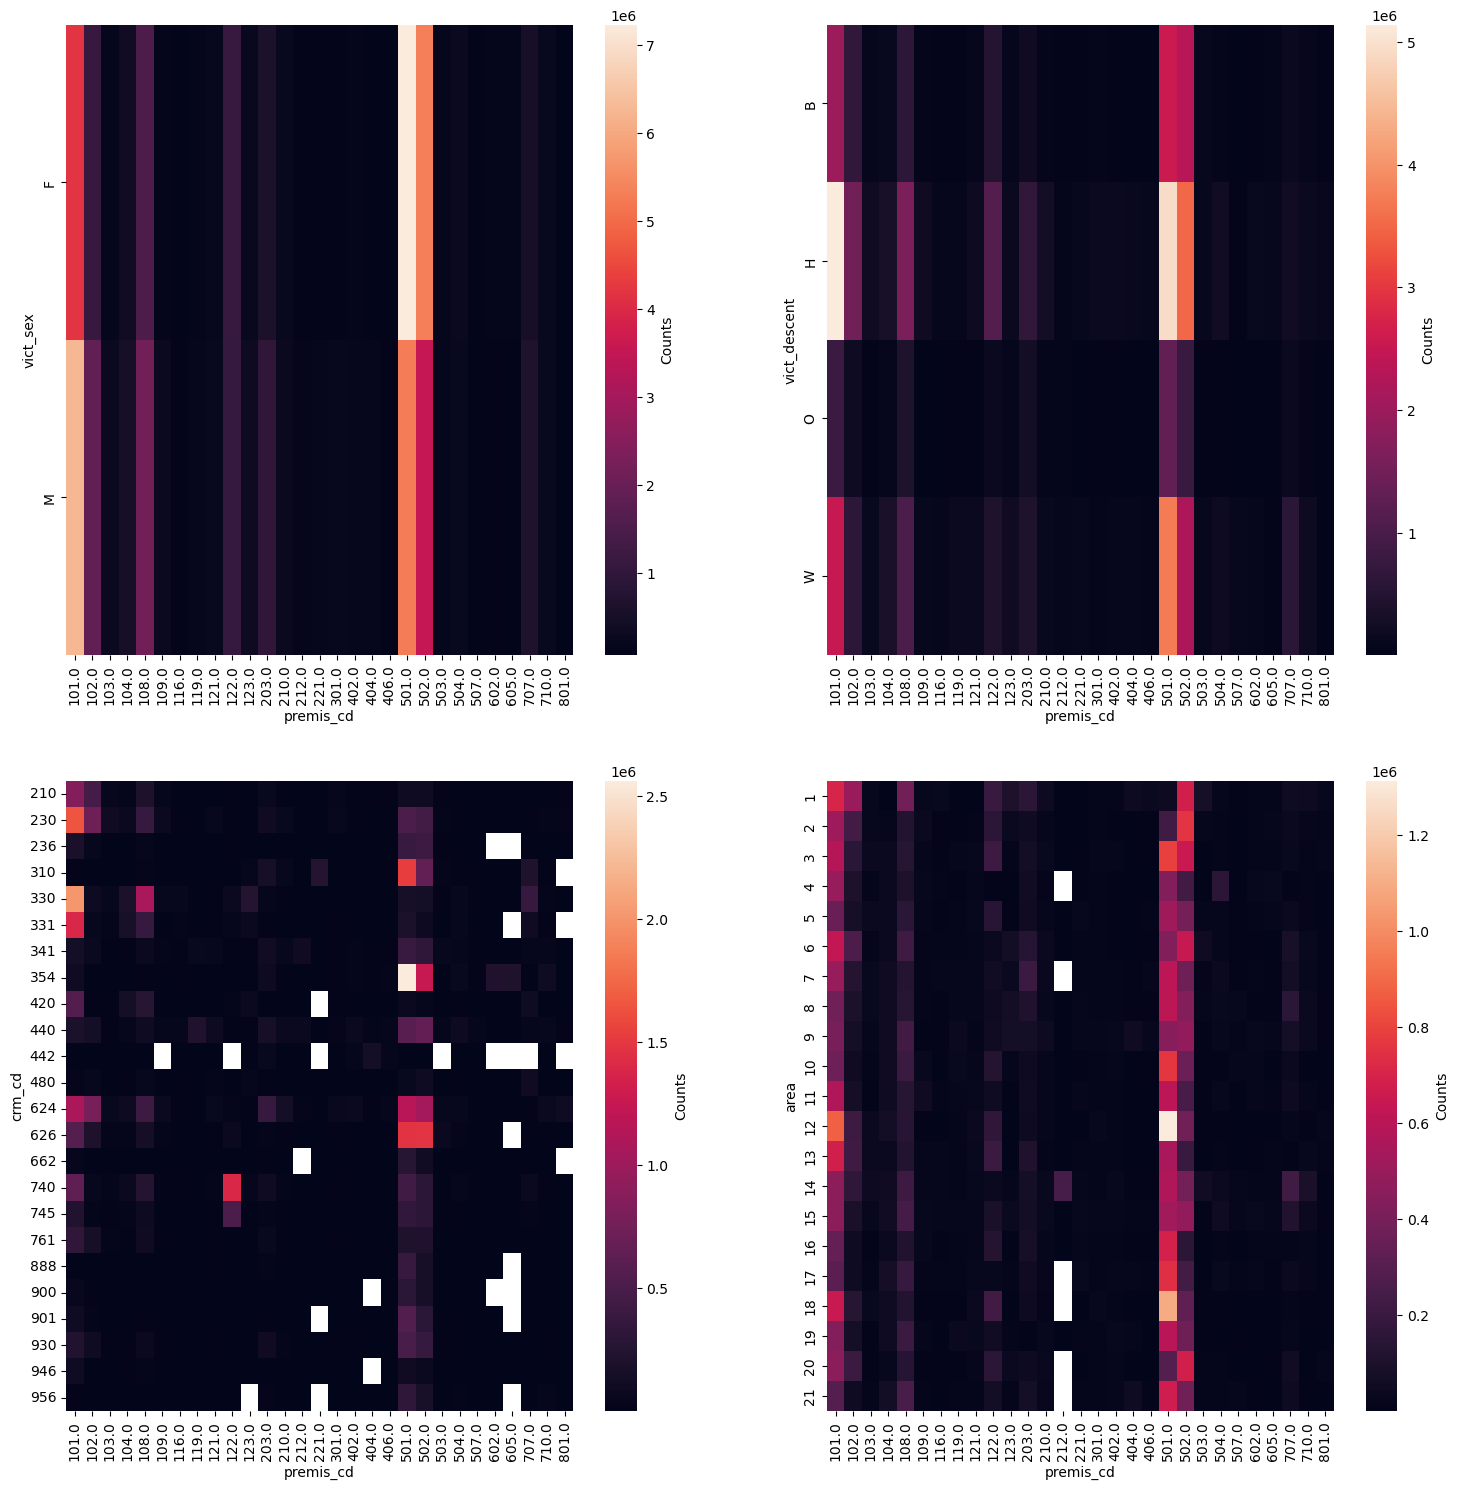

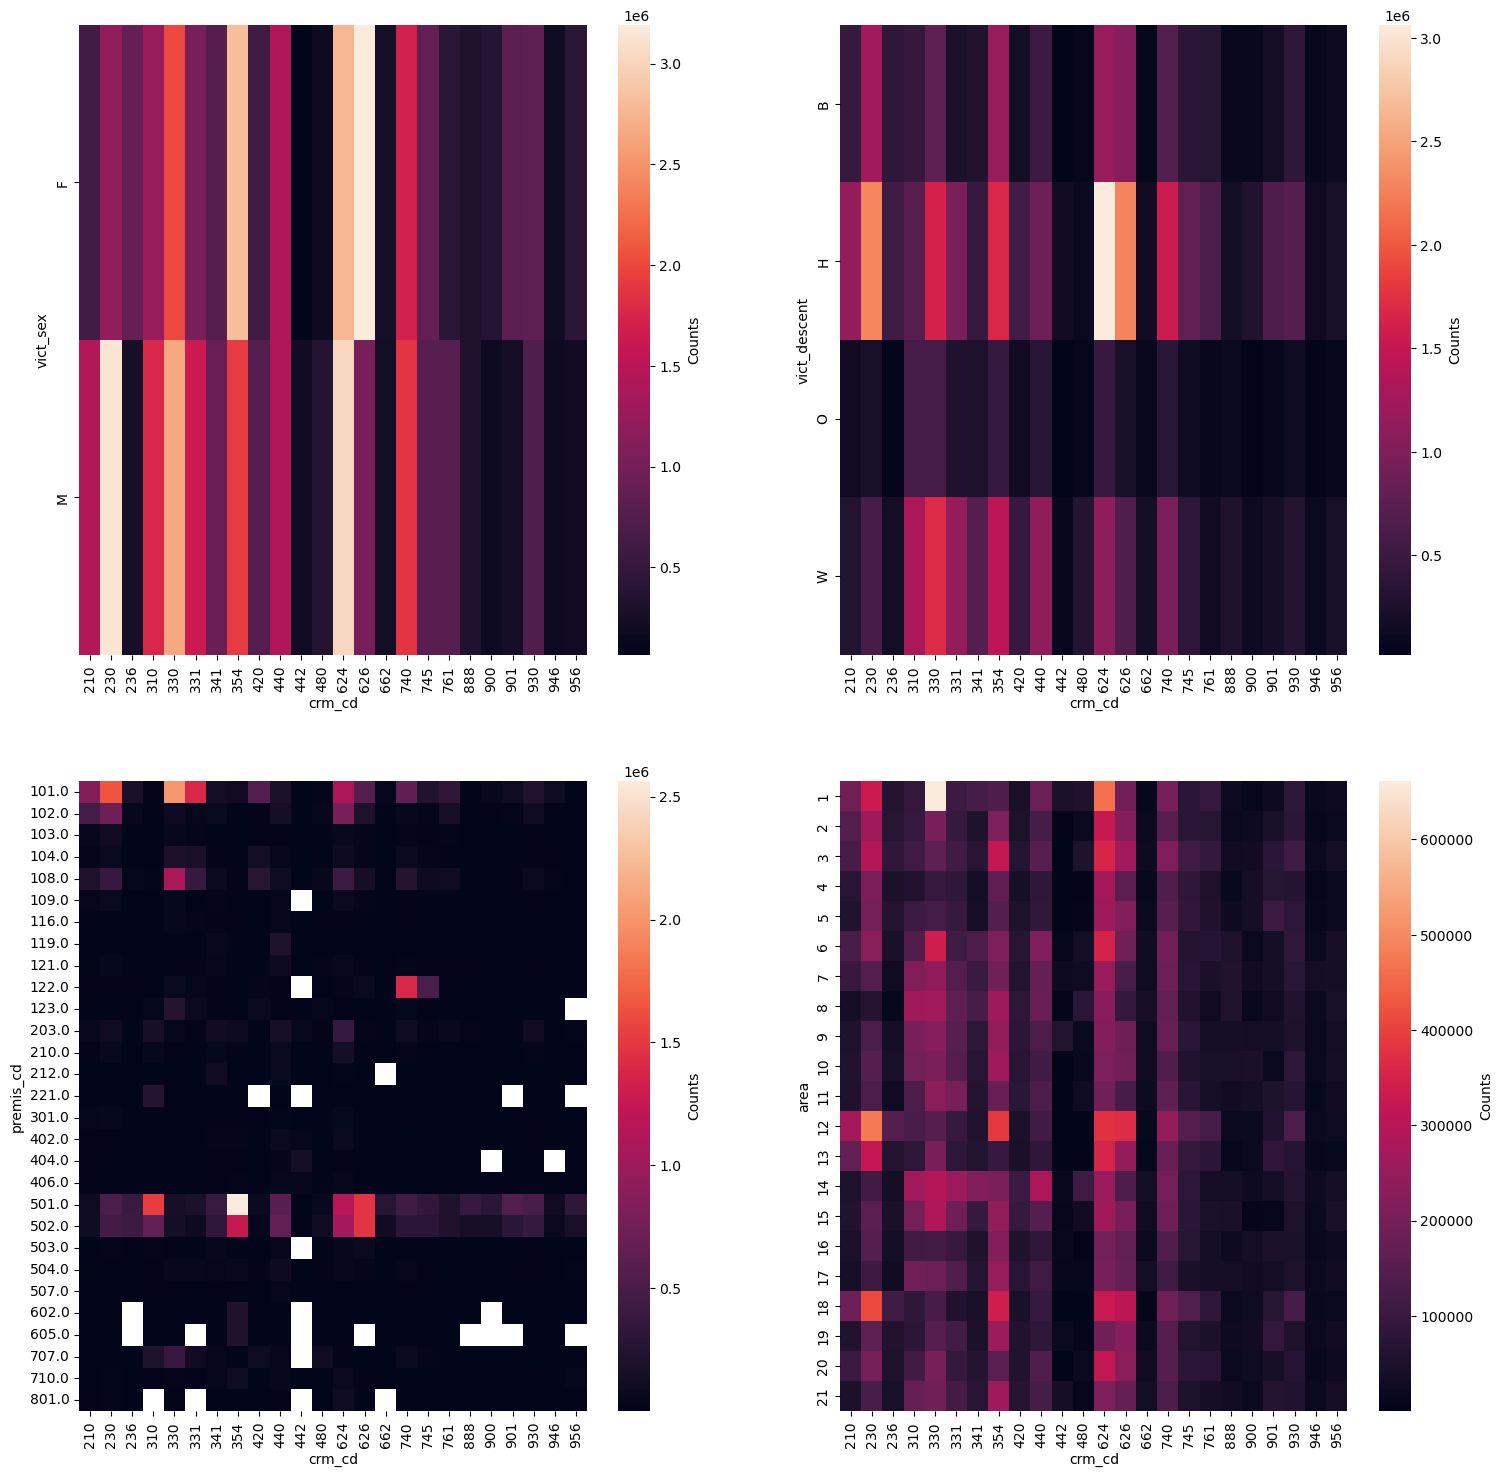

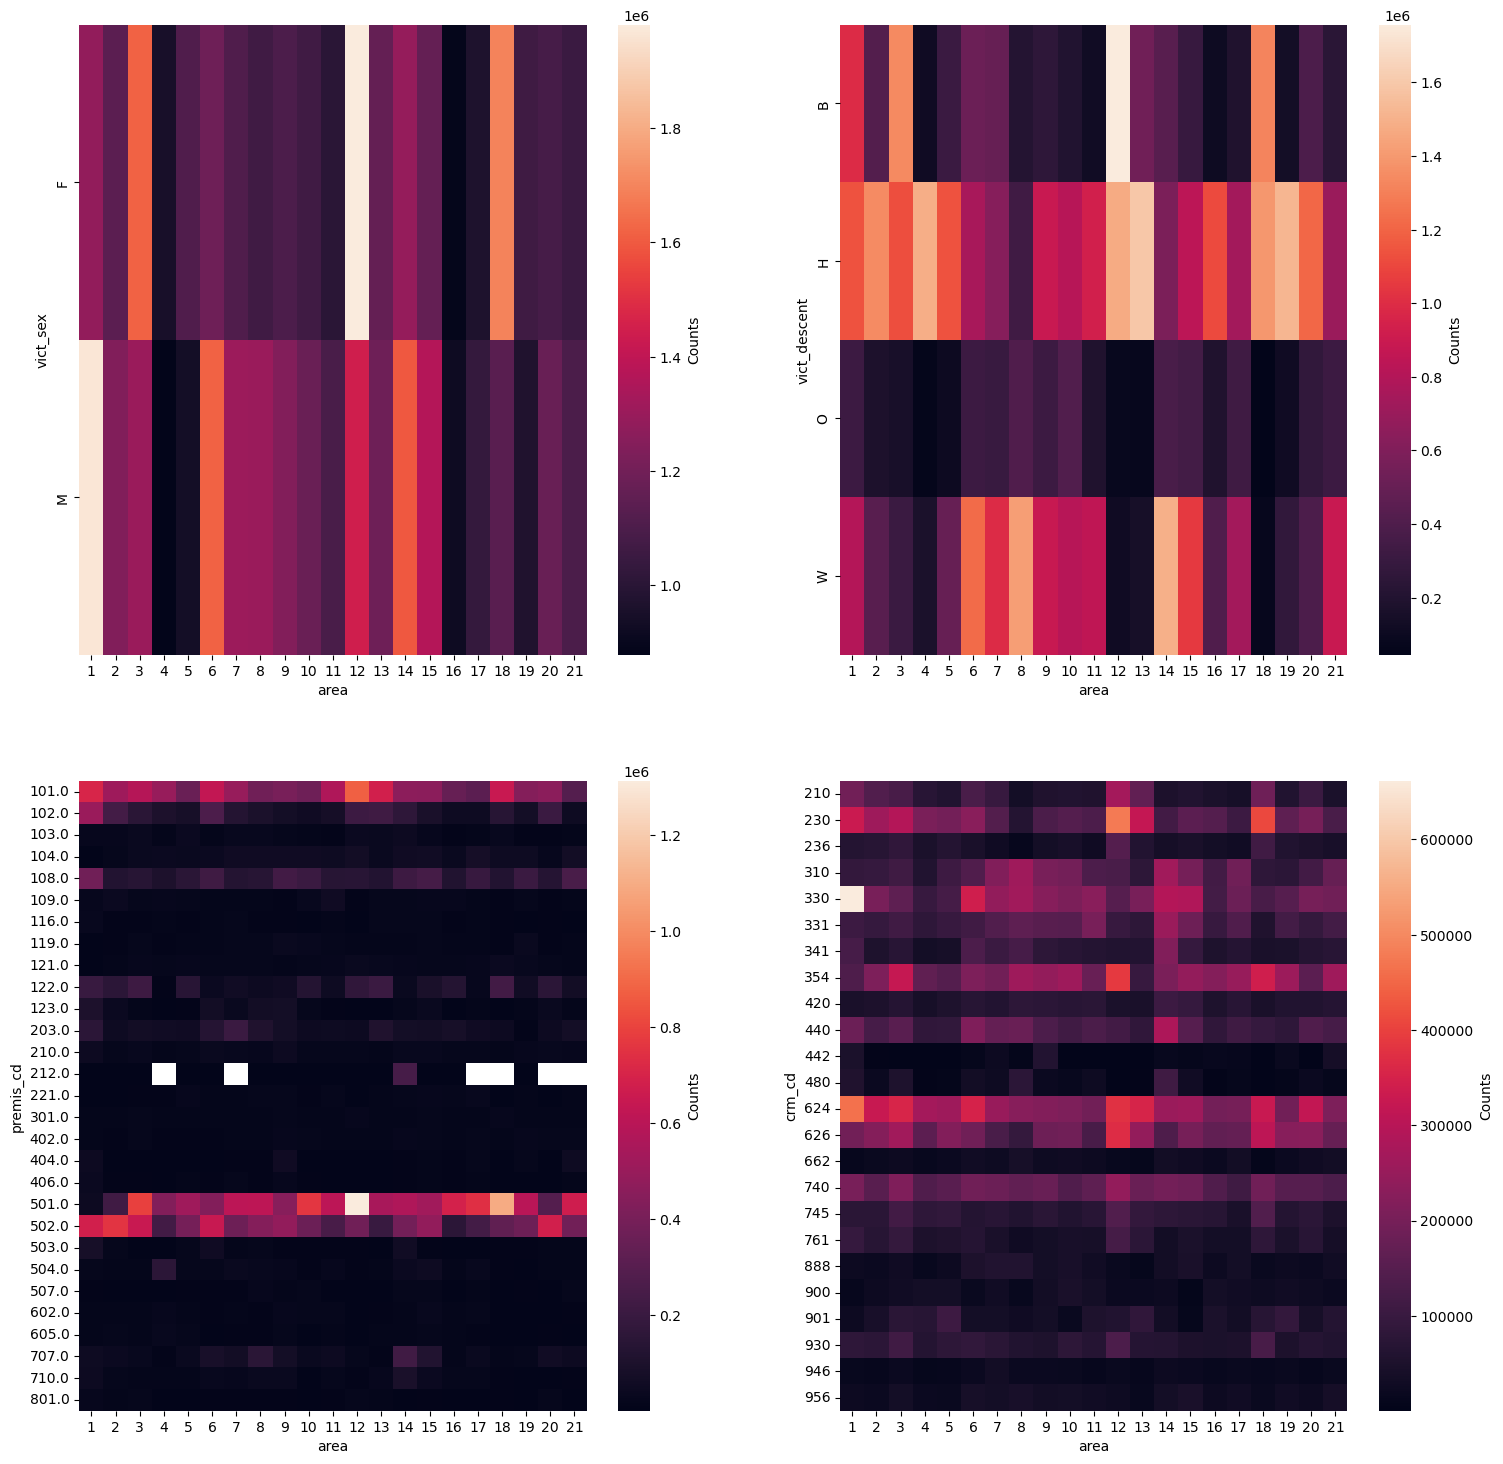

In [119]:
plotHeatmaps(data=df[cat_cols], normalize=False)

### Heatmap for each categorical feature vs other categorical features (Normalized)
Colorbar is the percentage of each combination for the feature in x-axis.

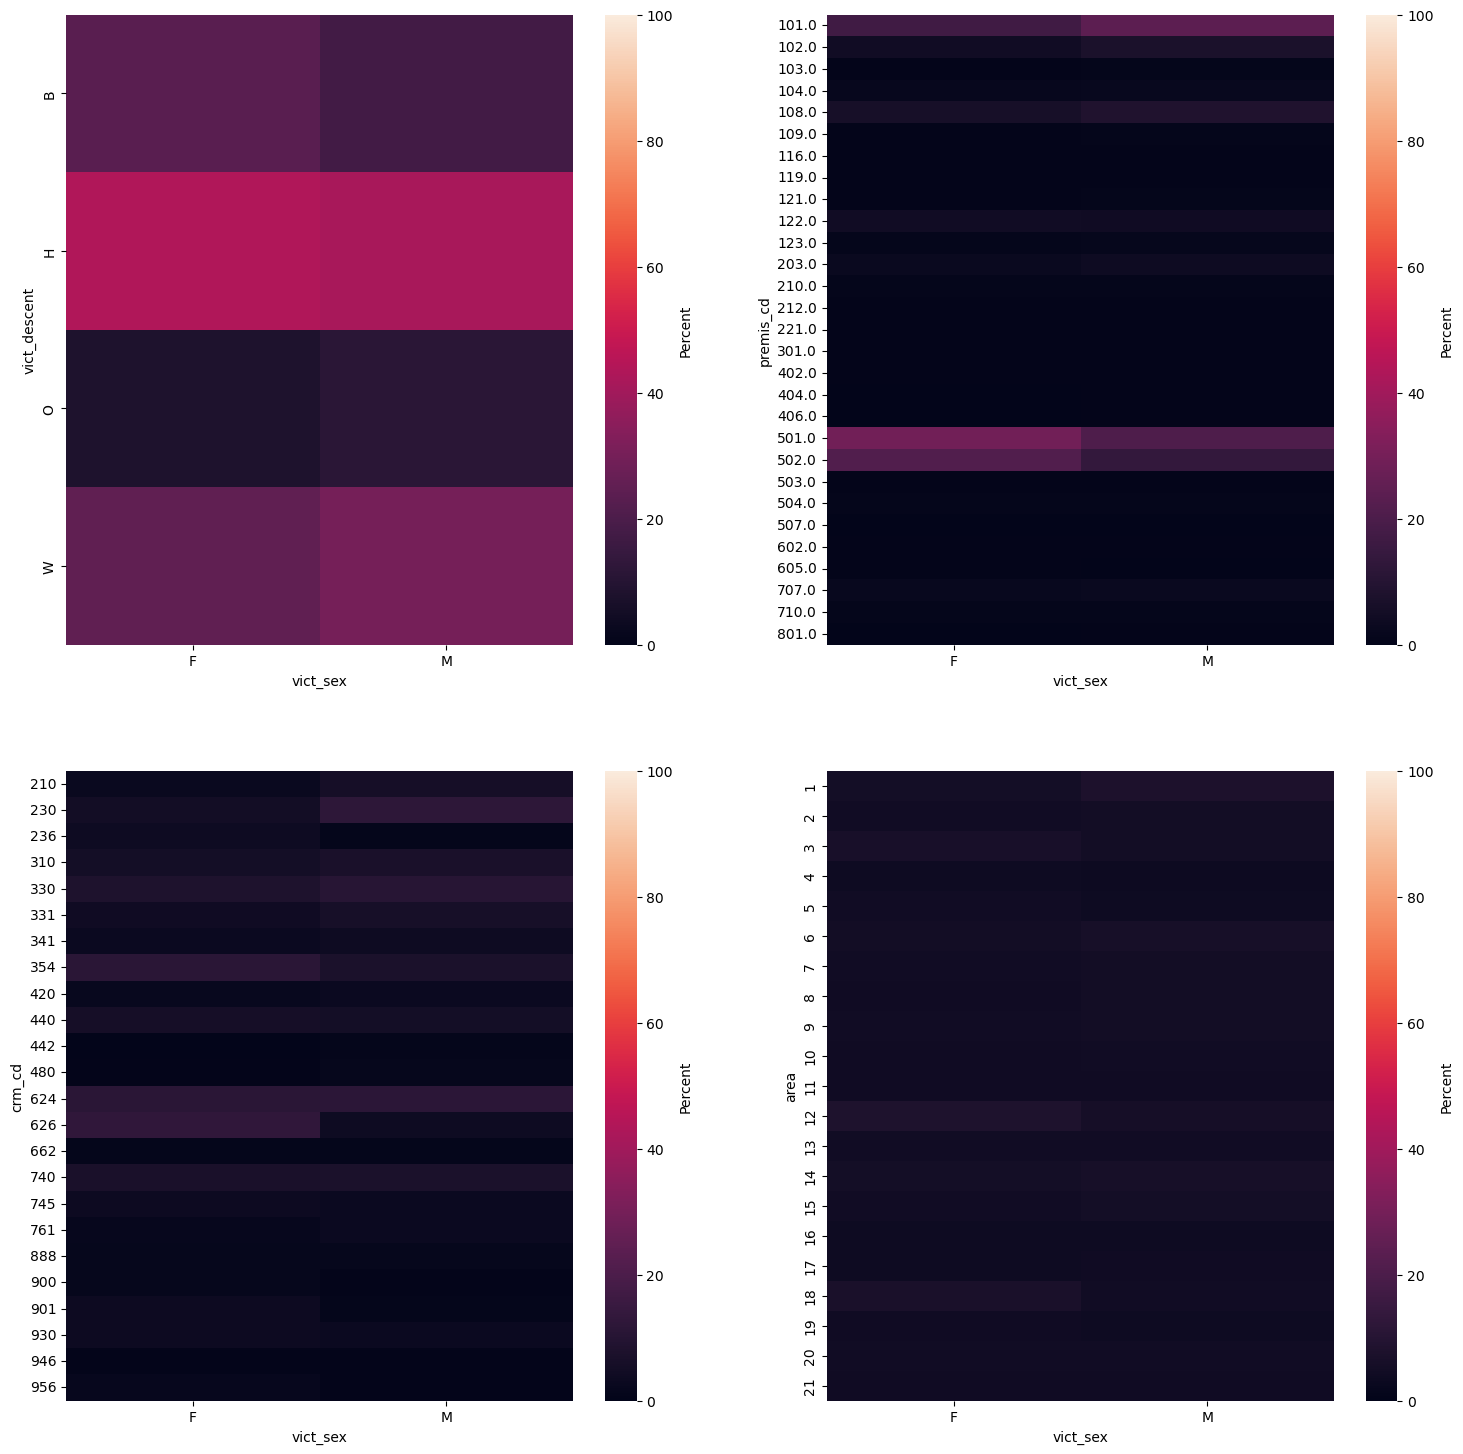

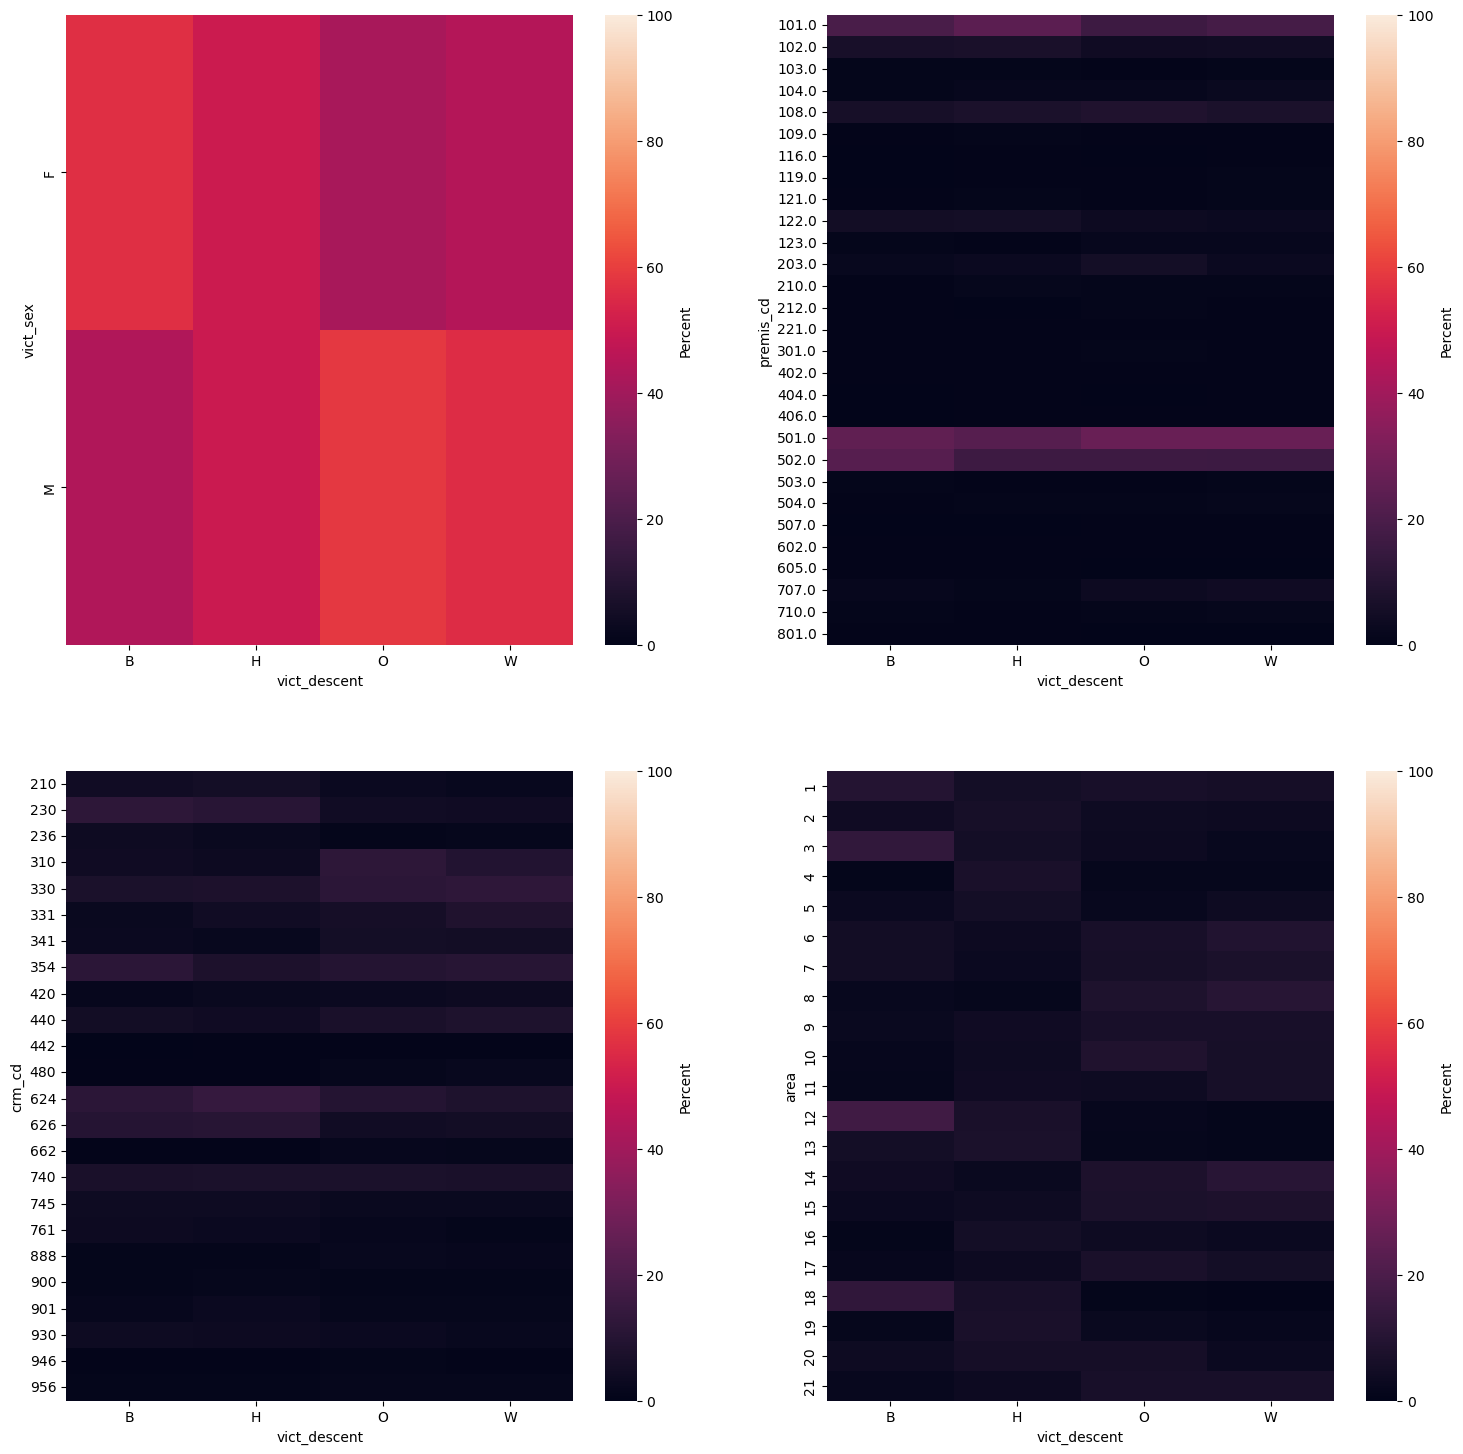

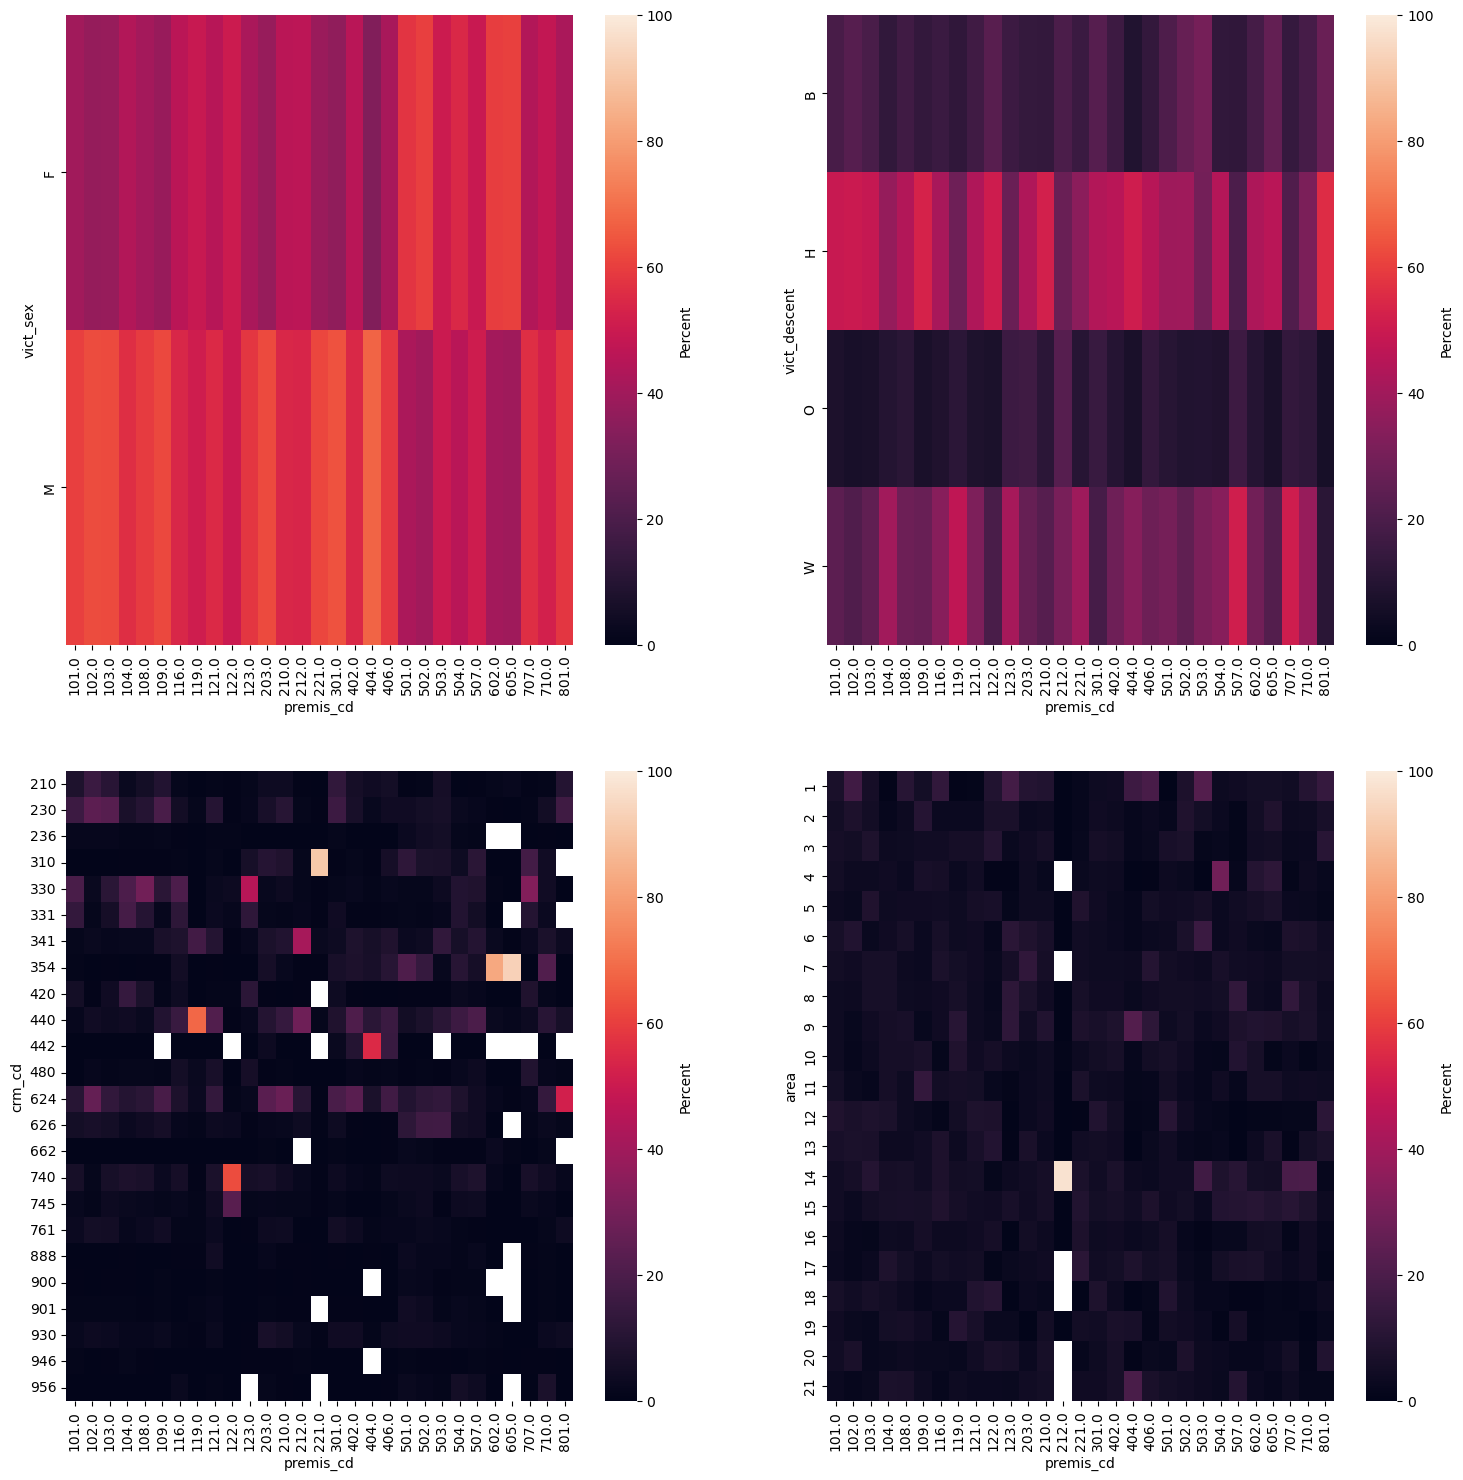

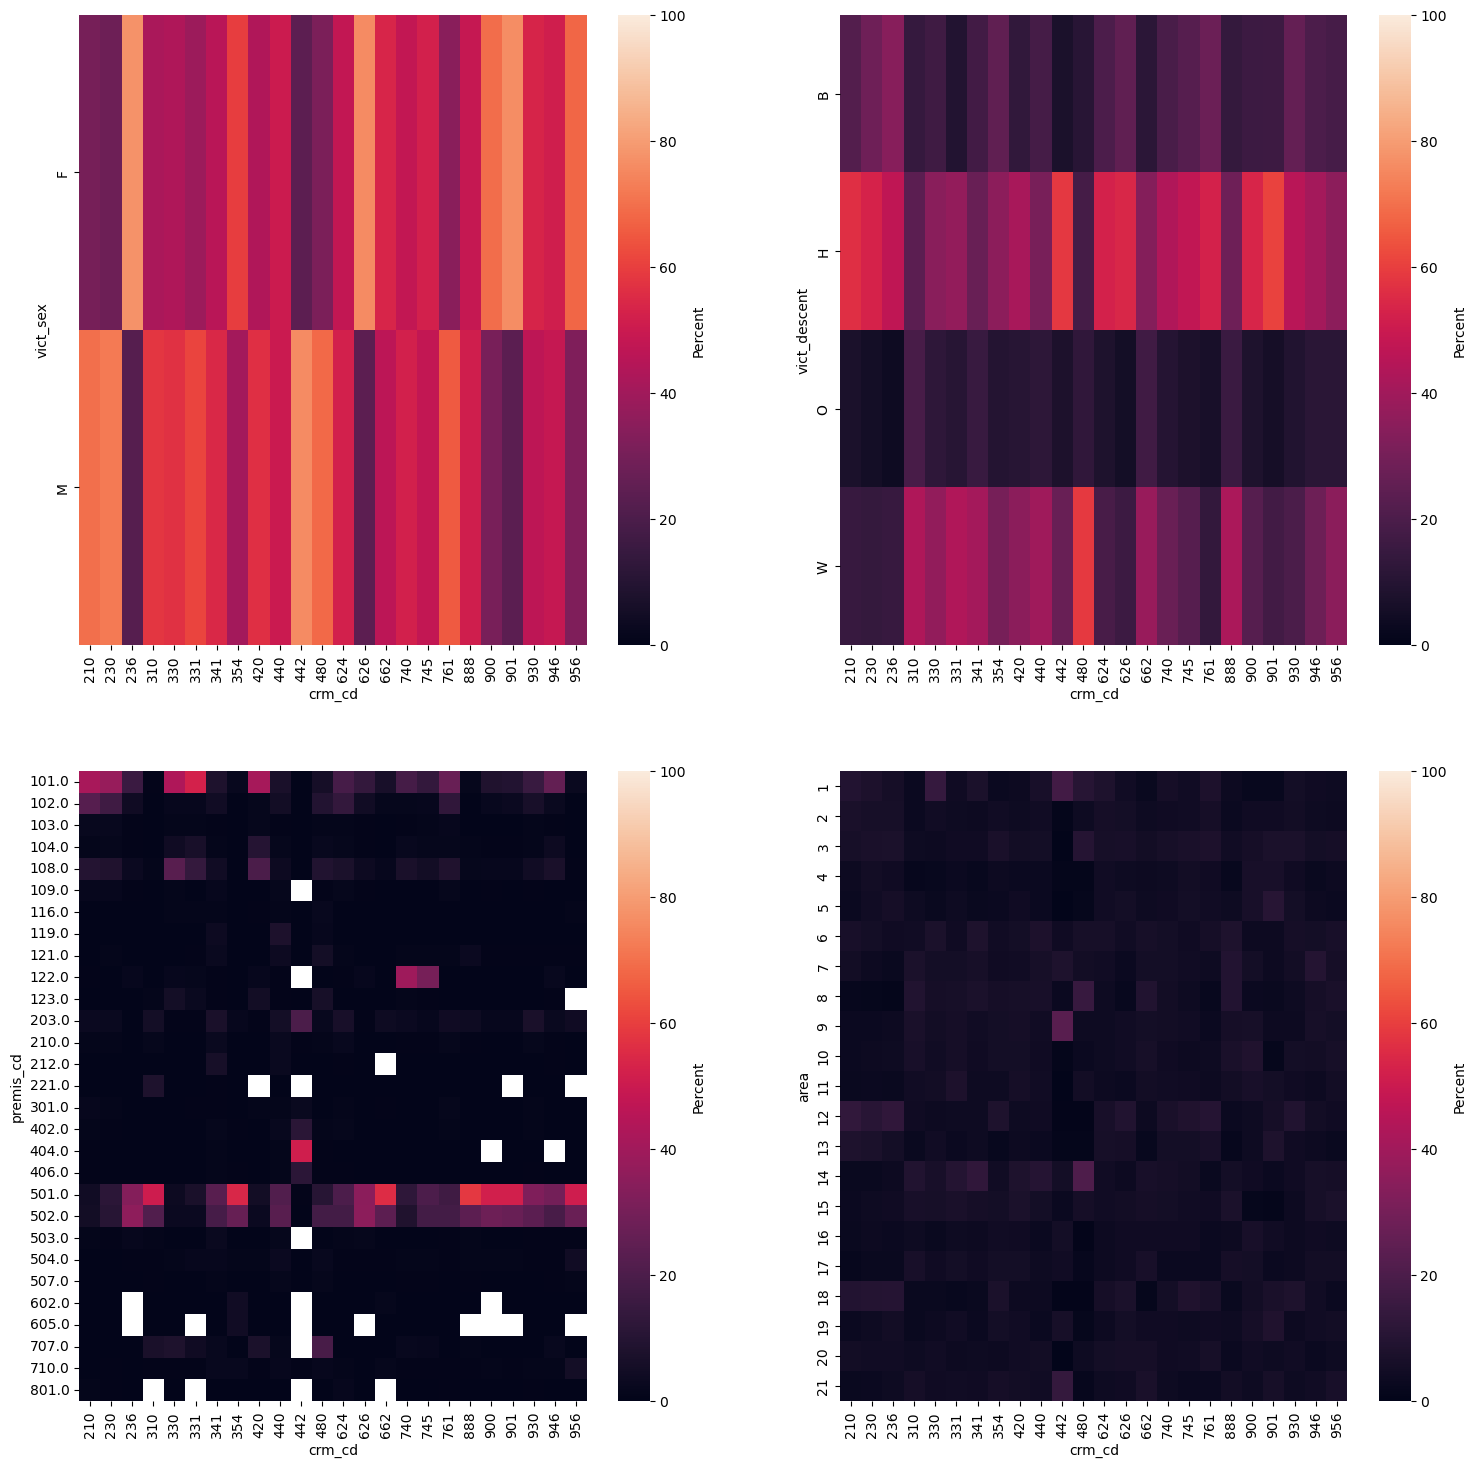

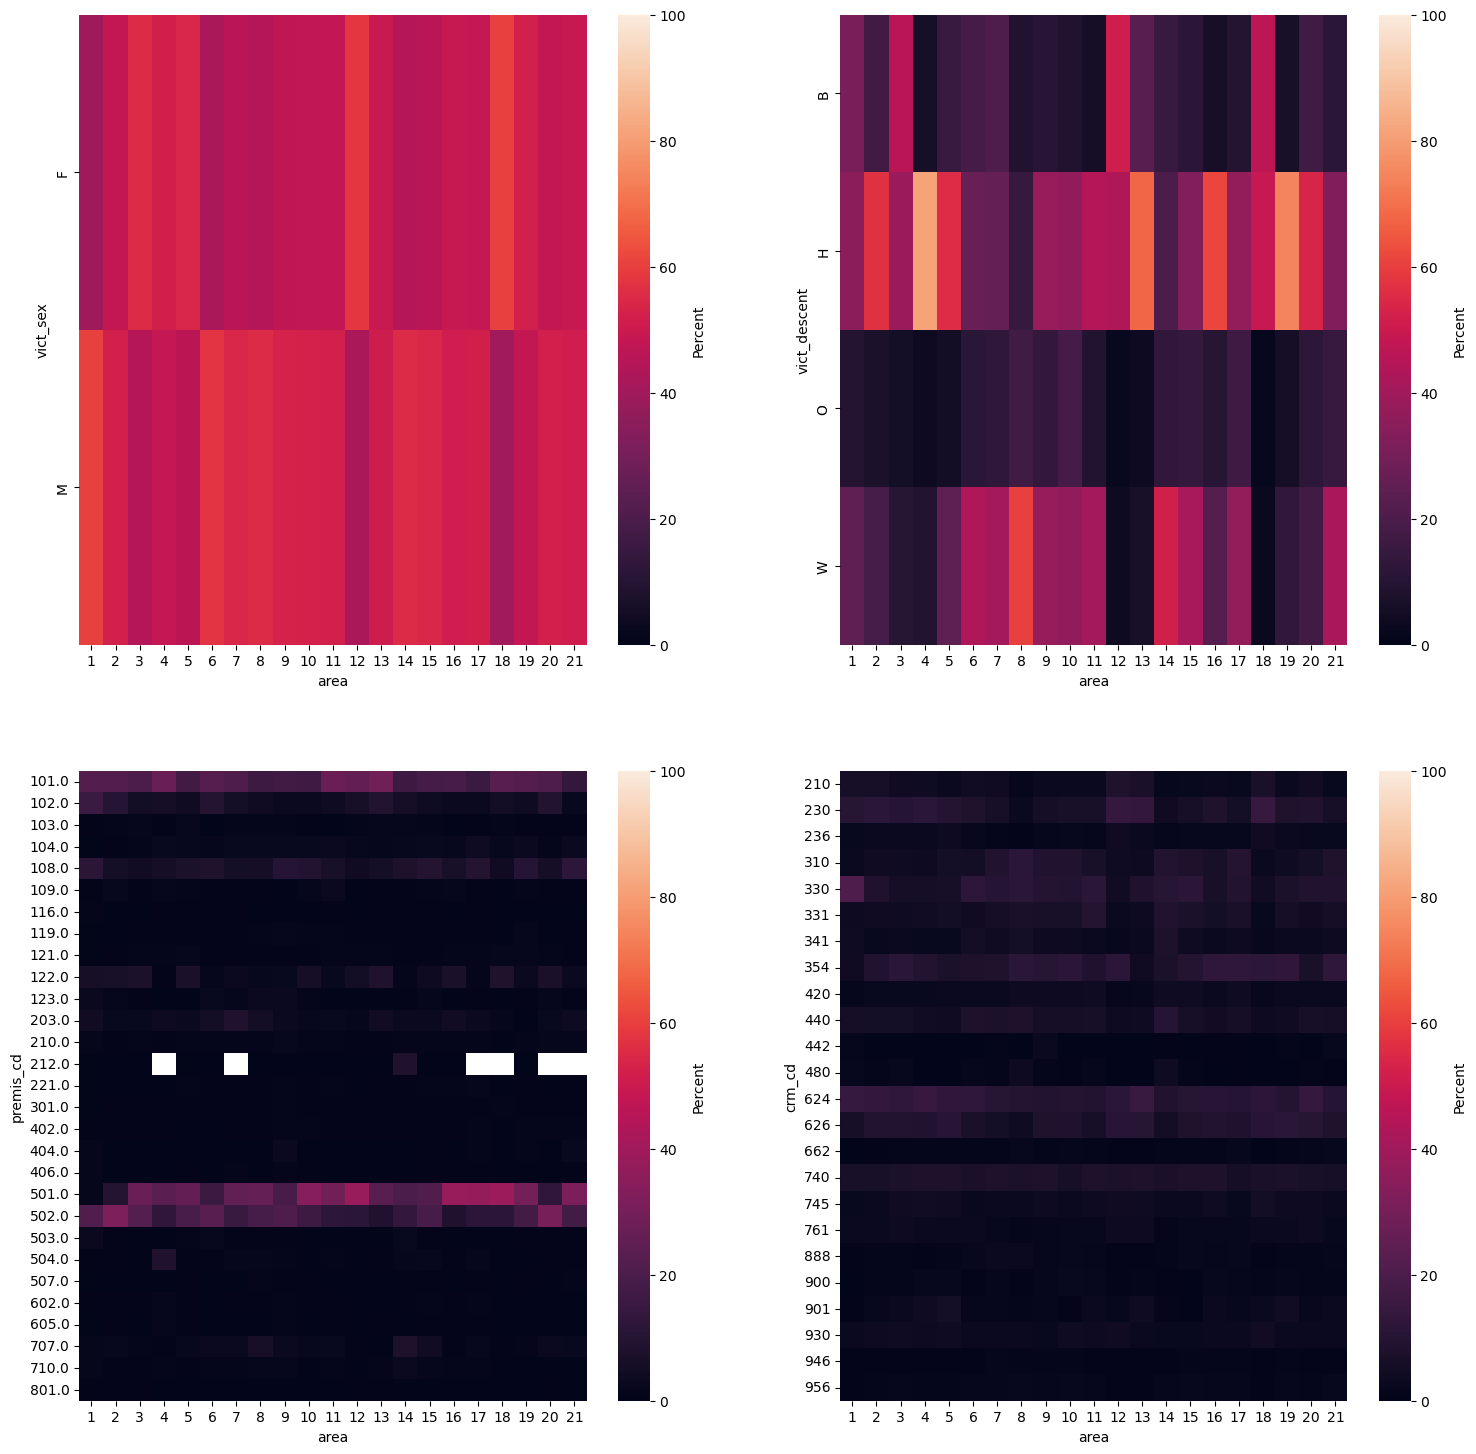

In [121]:
plotHeatmaps(data=df[cat_cols], normalize=True)

# Getting the meaning of codes in features

In [129]:
crm_codes = df['crm_cd'].unique().tolist()
df_filtered = data.loc[data['Crm Cd'].isin(crm_codes), ['Crm Cd', 'Crm Cd Desc']]
crm_code_meaning = df_filtered.groupby('Crm Cd').first().reset_index()
crm_code_meaning.set_index('Crm Cd')

,Crm Cd Desc
Crm Cd,
210,ROBBERY
230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT"
236,INTIMATE PARTNER - AGGRAVATED ASSAULT
310,BURGLARY
330,BURGLARY FROM VEHICLE
331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...
341,"THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LI..."
354,THEFT OF IDENTITY
420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)


In [134]:
premis_codes = df['premis_cd'].unique().tolist()
df_filtered = data.loc[data['Premis Cd'].isin(premis_codes), ['Premis Cd', 'Premis Desc']]
premis_code_meaning = df_filtered.groupby('Premis Cd').first().reset_index()
premis_code_meaning.set_index('Premis Cd')

,Premis Desc
Premis Cd,
101.0,STREET
102.0,SIDEWALK
103.0,ALLEY
104.0,DRIVEWAY
108.0,PARKING LOT
109.0,PARK/PLAYGROUND
116.0,OTHER/OUTSIDE
119.0,"PORCH, RESIDENTIAL"
121.0,YARD (RESIDENTIAL/BUSINESS)


In [136]:
crm_codes = df['area'].unique().tolist()
df_filtered = data.loc[data['AREA'].isin(crm_codes), ['AREA', 'AREA NAME']]
crm_code_meaning = df_filtered.groupby('AREA').first().reset_index()
crm_code_meaning.set_index('AREA')

,AREA NAME
AREA,
1,Central
2,Rampart
3,Southwest
4,Hollenbeck
5,Harbor
6,Hollywood
7,Wilshire
8,West LA
9,Van Nuys


# pip install dython

from dython.nominal import theils_u

def catHeatmap(data):
    # data = data.copy()
    tmp = pd.DataFrame(columns=data.columns)

    for col1 in data.columns:
        for col2 in data.columns:
            theils_u_value = theils_u(x=data[col1], y=data[col2])
            tmp.loc[col1, col2] = theils_u_value
            
    tmp = tmp.apply(pd.to_numeric, errors='coerce')
    return tmp
                
# corr = catHeatmap(df[cat_cols])

sns.heatmap(corr)

sample_data = {
    'Column1': range(1, 11),  # Sample data for Column1
    'Column2': range(11, 21),  # Sample data for Column2
    'Column3': range(21, 31)  # Sample data for Column3
}
# sample_df = pd.DataFrame(sample_data, index=[0,9,8,7,6,5,4,3,2,1])
sample_df = pd.DataFrame(sample_data)
sample_df.index = [0,9,8,7,6,5,4,3,2,1]
sample_df